In [571]:
import pandas as pd
import numpy as np 
import sidetable 
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = None 
df = pd.read_csv('./datos/data_analyst.csv', index_col = 0)
df.head()

,index,q3,q5,q6,q8,q11,q13,q15,q23,q33,q41,q7,q9,q12,q14,q16,q17,q24,q28,q10,q18,q19,q27,q29,q30,q31,q36,q37,q38,q39,q40,q42
32,32,United States of America,Data Analyst,< 1 years,R,A personal computer / desktop,Never,I do not use machine learning methods,NaN,NaN,NaN,R,RStudio,NVIDIA GPUs,Ggplot / ggplot2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,46,China,Data Analyst,< 1 years,Python,A personal computer / desktop,2-5 times,1-2 years,No (we do not use ML methods),NaN,"Basic statistical software (Microsoft Excel, G...","Python, SQL, C, C++, Java, Javascript, MATLAB","Jupyter (JupyterLab, Jupyter Notebooks, etc) ,...",NVIDIA GPUs,"Matplotlib ,Plotly / Plotly Express","Scikit-learn , TensorFlow ,Keras ,PyTorch","Linear or Logistic Regression, Decision Trees ...",Analyze and understand data to influence produ...,NaN,Kaggle Notebooks?,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Coursera?edX?Kaggle Learn Courses?,Twitter (data science influencers)?
66,66,China,Data Analyst,< 1 years,Python,A laptop,Never,< 1 year,I do not know,NaN,"Basic statistical software (Microsoft Excel, G...",Python,"PyCharm , Spyder",None,None,Other,Other,Analyze and understand data to influence produ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
102,102,India,Data Analyst,< 1 years,Python,A laptop,Once,< 1 year,We are exploring ML methods (and may one day p...,NaN,"Basic statistical software (Microsoft Excel, G...",Python,"Jupyter (JupyterLab, Jupyter Notebooks, etc) ,...",None,"Matplotlib ,Seaborn ,Ggplot / ggplot2","Scikit-learn , TensorFlow ,Keras ,Xgboost","Linear or Logistic Regression, Decision Trees ...",Analyze and understand data to influence produ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Coursera?,NaN
108,108,Israel,Data Analyst,< 1 years,Python,A personal computer / desktop,Never,I do not use machine learning methods,We use ML methods for generating insights (but...,NaN,"Business intelligence software (Salesforce, Ta...","Python, SQL","Jupyter Notebook, Other",None,"Matplotlib ,Seaborn",NaN,NaN,Analyze and understand data to influence produ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Coursera?,NaN


In [572]:
df['q6'].unique()

array(['< 1 years', 'I have never written code'], dtype=object)

In [573]:
df_q10=df['q10'].reset_index()
df_q10

,index,q10
0,32,NaN
1,46,Kaggle Notebooks?
2,66,NaN
3,102,NaN
4,108,NaN
...,...,...
746,25811,NaN
747,25819,NaN
748,25909,NaN
749,25916,NaN


In [574]:

def quitar_comillas (col):
        try:
            return col.split('?')
        except:
            np.nan

In [575]:
df_q10['q10'] = df_q10['q10'].apply(quitar_comillas)

In [576]:
df_10_explode = df_q10['q10'].explode().reset_index()

In [577]:
df_10_explode

,index,q10
0,0,None
1,1,Kaggle Notebooks
2,1,
3,2,None
4,3,None
...,...,...
1070,746,None
1071,747,None
1072,748,None
1073,749,None


In [578]:
df_10_explode['q10'].unique()

array([None, ' Kaggle Notebooks', '', 'Colab Notebooks',
       'Azure Notebooks', ' Paperspace / Gradient ',
       ' Binder / JupyterHub ', ' Code Ocean ', ' IBM Watson Studio ',
       ' Amazon Sagemaker Studio Notebooks ', ' Amazon EMR Notebooks ',
       'Google Cloud Notebooks (AI Platform / Vertex AI) ',
       'Google Cloud Datalab', ' Databricks Collaborative Notebooks ',
       ' Zeppelin / Zepl Notebooks ', ' Deepnote Notebooks ',
       ' Observable Notebooks '], dtype=object)

In [579]:
gb = df_10_explode.groupby('q10').size() #aqui tenemos todos los espacios, que se tienen que desestimar 
#para la creacion de las graficas

In [580]:
df_q10 = gb.reset_index(name='count')

In [581]:
df_q10.drop(0, axis= 0,inplace=True)

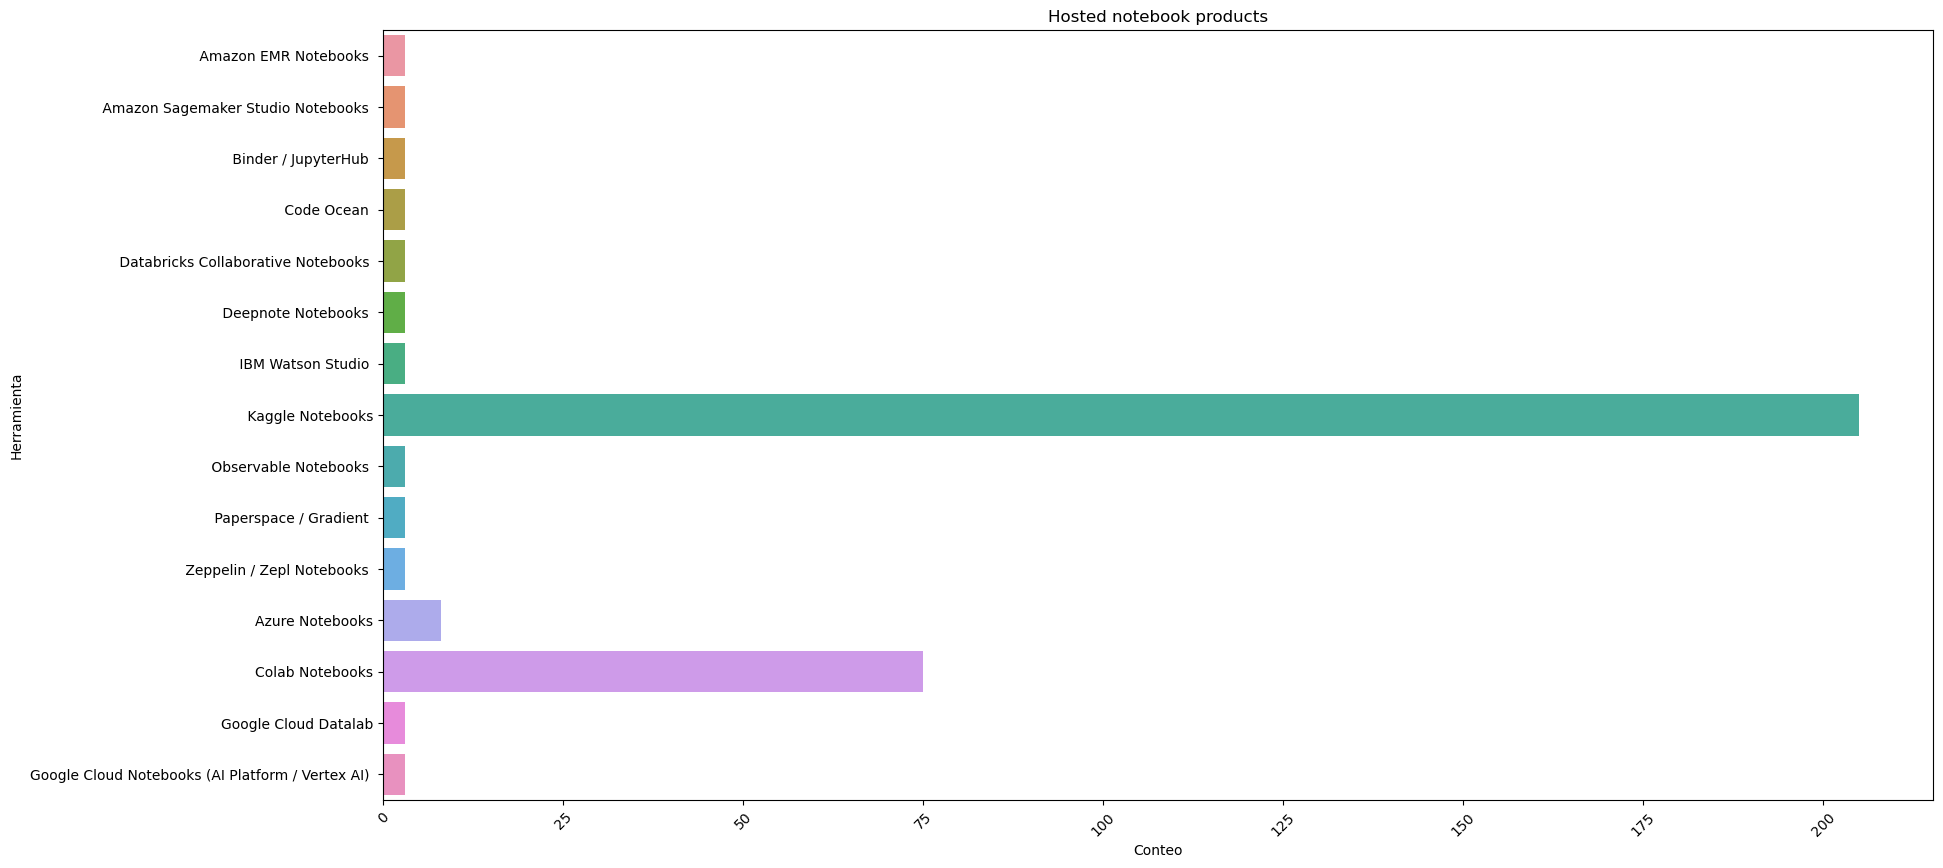

In [582]:
plt.figure(figsize=(20,10))
fig=sns.barplot(x ='count', y = 'q10', data=df_q10)
plt.title('Hosted notebook products')
plt.xticks(rotation = 45)
fig.set(ylabel='Herramienta', xlabel= 'Conteo');

#los data analyst recomiendan kaggle como entorno colaborativo para ejecutar código

In [583]:
#q19

df_q19 = df['q19'].reset_index()
df_q19

,index,q19
0,32,NaN
1,46,NaN
2,66,NaN
3,102,NaN
4,108,NaN
...,...,...
746,25811,NaN
747,25819,NaN
748,25909,NaN
749,25916,NaN


In [584]:
df_q19['q19'] = df_q19['q19'].apply(quitar_comillas)

In [585]:
df_19_explode = df_q19['q19'].explode().reset_index()

In [586]:
df_19_explode

,index,q19
0,0,None
1,1,None
2,2,None
3,3,None
4,4,None
...,...,...
779,746,None
780,747,None
781,748,None
782,749,None


In [587]:
df_19_explode['q19'].unique()

array([None, 'Word embeddings/vectors (GLoVe, fastText, word2vec)', '',
       'Encoder-decorder models (seq2seq, vanilla transformers)',
       'Contextualized embeddings (ELMo, CoVe)',
       'Transformer language models (GPT-3, BERT, XLnet, etc)'],
      dtype=object)

In [588]:
df_19_explode

,index,q19
0,0,None
1,1,None
2,2,None
3,3,None
4,4,None
...,...,...
779,746,None
780,747,None
781,748,None
782,749,None


In [721]:
df_19_explode['q19'].unique()

array([None, 'Word embeddings/vectors (GLoVe, fastText, word2vec)', '',
       'Encoder-decorder models (seq2seq, vanilla transformers)',
       'Contextualized embeddings (ELMo, CoVe)',
       'Transformer language models (GPT-3, BERT, XLnet, etc)'],
      dtype=object)

In [589]:
gb_19 = df_19_explode.groupby('q19').size() #aqui tenemos todos los espacios, que se tienen que desestimar 
#para la creacion de las graficas

In [590]:
gb_19

q19
                                                           15
Contextualized embeddings (ELMo, CoVe)                      4
Encoder-decorder models (seq2seq, vanilla transformers)    11
Transformer language models (GPT-3, BERT, XLnet, etc)       3
Word embeddings/vectors (GLoVe, fastText, word2vec)        15
dtype: int64

In [591]:
df_q19 = gb_19.reset_index(name = 'count')

In [592]:
df_q19.drop(0, axis = 0,inplace = True)

In [593]:
df_q19

,q19,count
1,"Contextualized embeddings (ELMo, CoVe)",4
2,"Encoder-decorder models (seq2seq, vanilla tran...",11
3,"Transformer language models (GPT-3, BERT, XLne...",3
4,"Word embeddings/vectors (GLoVe, fastText, word...",15


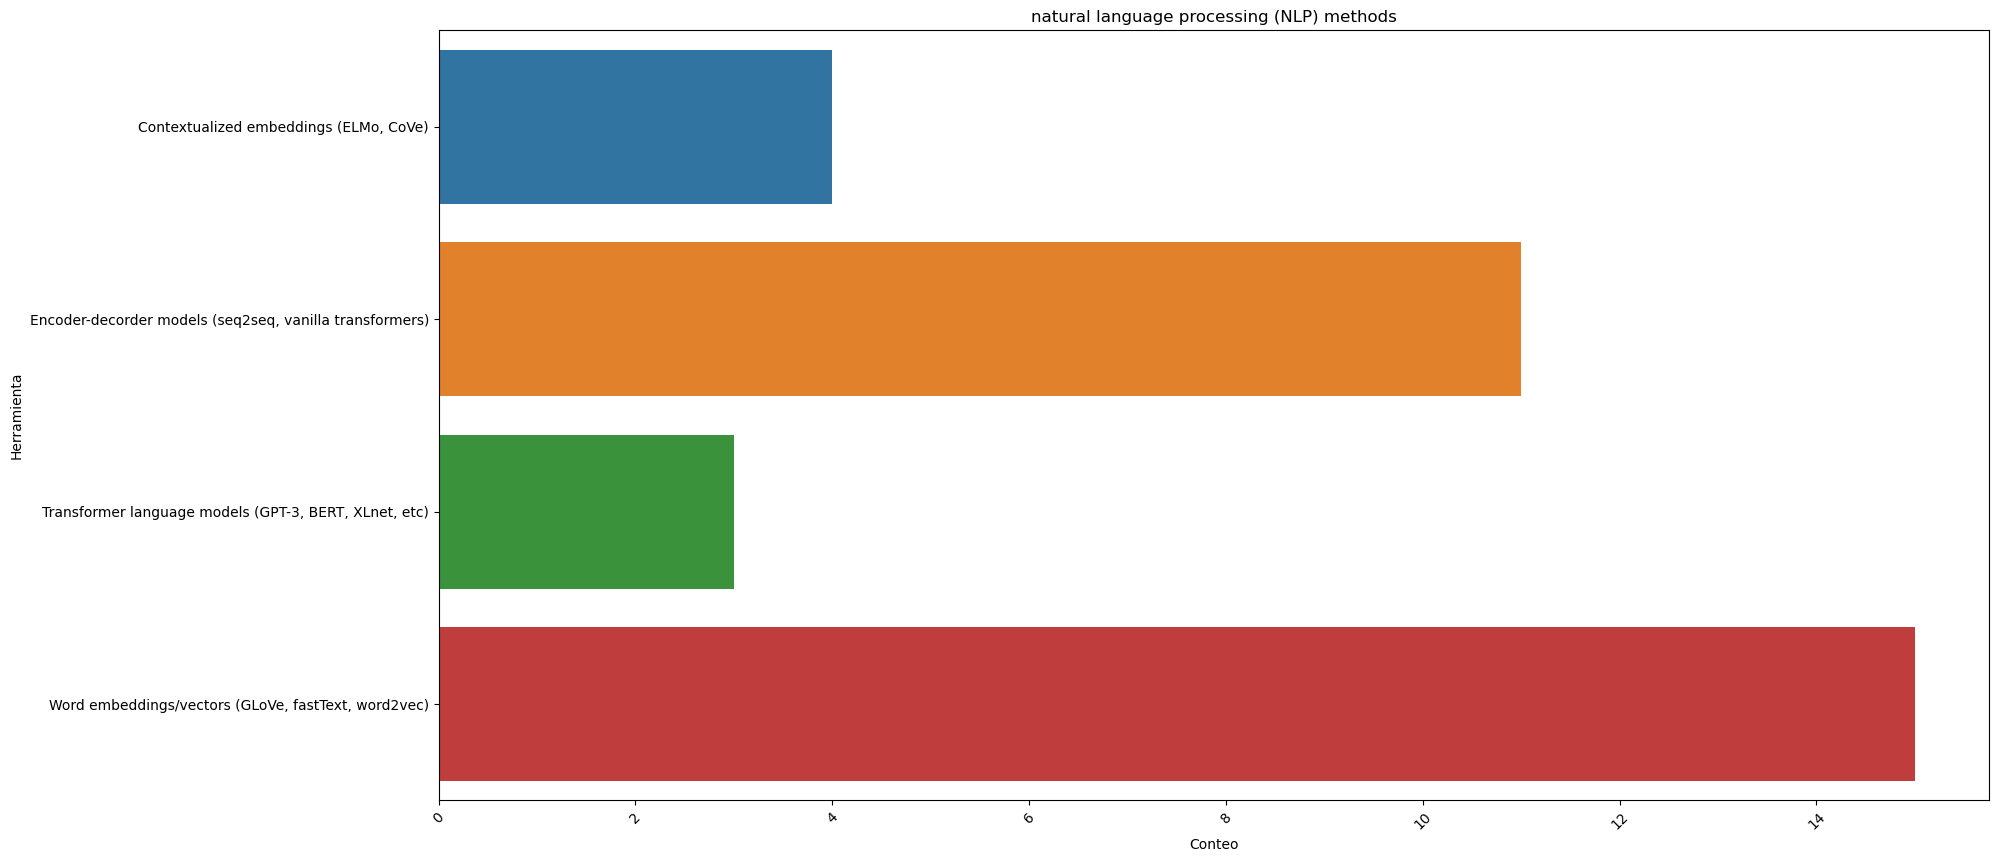

In [716]:
plt.figure(figsize=(20,10))
fig=sns.barplot(x='count', y = 'q19', data = df_q19)
plt.title('natural language processing (NLP) methods')
plt.xticks(rotation = 45)
fig.set(ylabel='Herramienta', xlabel= 'Conteo');


In [595]:
#q27

df_q27 = df['q27'].reset_index()
df_q27

,index,q27
0,32,NaN
1,46,NaN
2,66,NaN
3,102,NaN
4,108,NaN
...,...,...
746,25811,NaN
747,25819,NaN
748,25909,NaN
749,25916,NaN


In [596]:
df_q27['q27'] = df_q27['q27'].apply(quitar_comillas)

In [597]:
df_27_explode = df_q27['q27'].explode().reset_index()

In [598]:
df_27_explode

,index,q27
0,0,None
1,1,None
2,2,None
3,3,None
4,4,None
...,...,...
851,746,None
852,747,None
853,748,None
854,749,None


In [599]:
df_27_explode['q27'].unique()

array([None, ' Amazon Web Services (AWS) ', ' Microsoft Azure ',
       ' Google Cloud Platform (GCP) ', '', ' IBM Cloud / Red Hat '],
      dtype=object)

In [600]:
gb_27 = df_27_explode.groupby('q27').size() #aqui tenemos todos los espacios, que se tienen que desestimar 
#para la creacion de las graficas

In [601]:
df_q27 = gb_27.reset_index(name = 'count')

In [602]:
df_q27.drop(0, axis = 0,inplace = True)

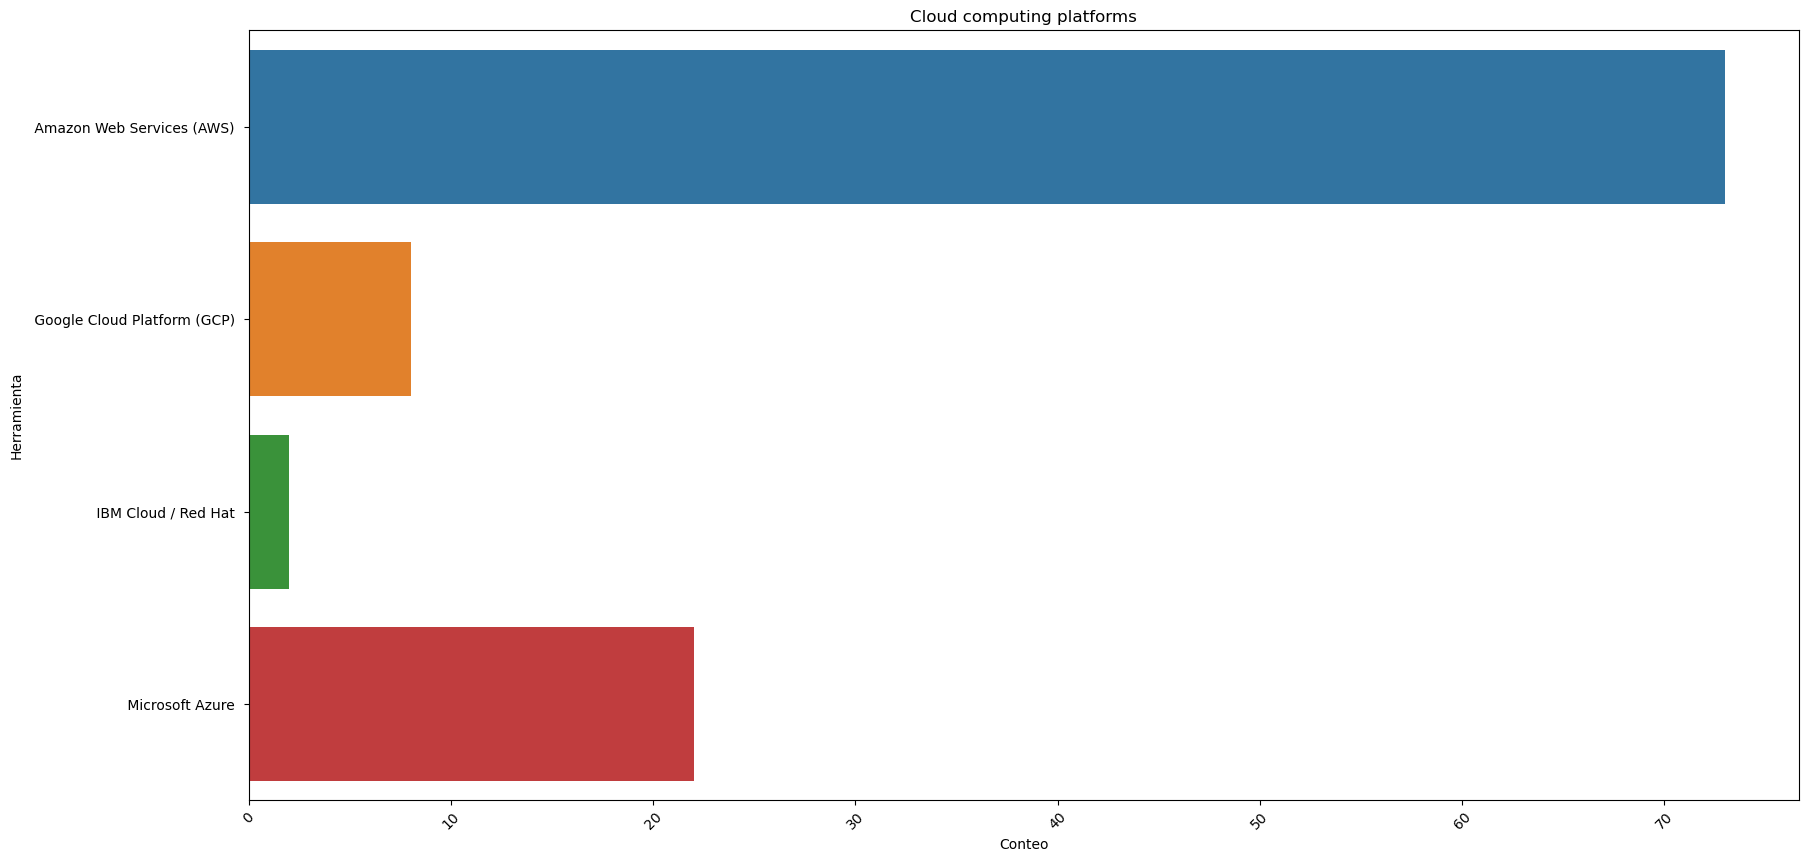

In [722]:
plt.figure(figsize=(20,10))
fig=sns.barplot(x ='count', y = 'q27', data = df_q27)
plt.title('Cloud computing platforms')
fig.set(ylabel='Herramienta', xlabel= 'Conteo')
plt.xticks(rotation = 45);



# Q29

In [604]:
df_q29=df['q29'].reset_index()
df_q29

,index,q29
0,32,NaN
1,46,NaN
2,66,NaN
3,102,NaN
4,108,NaN
...,...,...
746,25811,NaN
747,25819,NaN
748,25909,NaN
749,25916,NaN


In [605]:
df_q29['q29'] = df_q29['q29'].apply(quitar_comillas)
df_q29

,index,q29
0,32,None
1,46,None
2,66,None
3,102,None
4,108,None
...,...,...
746,25811,None
747,25819,None
748,25909,None
749,25916,None


In [606]:
df_29_explode = df_q29['q29'].explode().reset_index()
df_29_explode


,index,q29
0,0,None
1,1,None
2,2,None
3,3,None
4,4,None
...,...,...
786,746,None
787,747,None
788,748,None
789,749,None


In [607]:
df_29_gp = df_29_explode.groupby('q29').size()
df_29_gp

q29
                                        31
 Amazon Elastic Compute Cloud (EC2)     31
 Google Cloud Compute Engine             2
 Microsoft Azure Virtual Machines        7
dtype: int64

In [608]:
df_29_gp = df_29_gp.reset_index(name='count')
df_29_gp

,q29,count
0,,31
1,Amazon Elastic Compute Cloud (EC2),31
2,Google Cloud Compute Engine,2
3,Microsoft Azure Virtual Machines,7


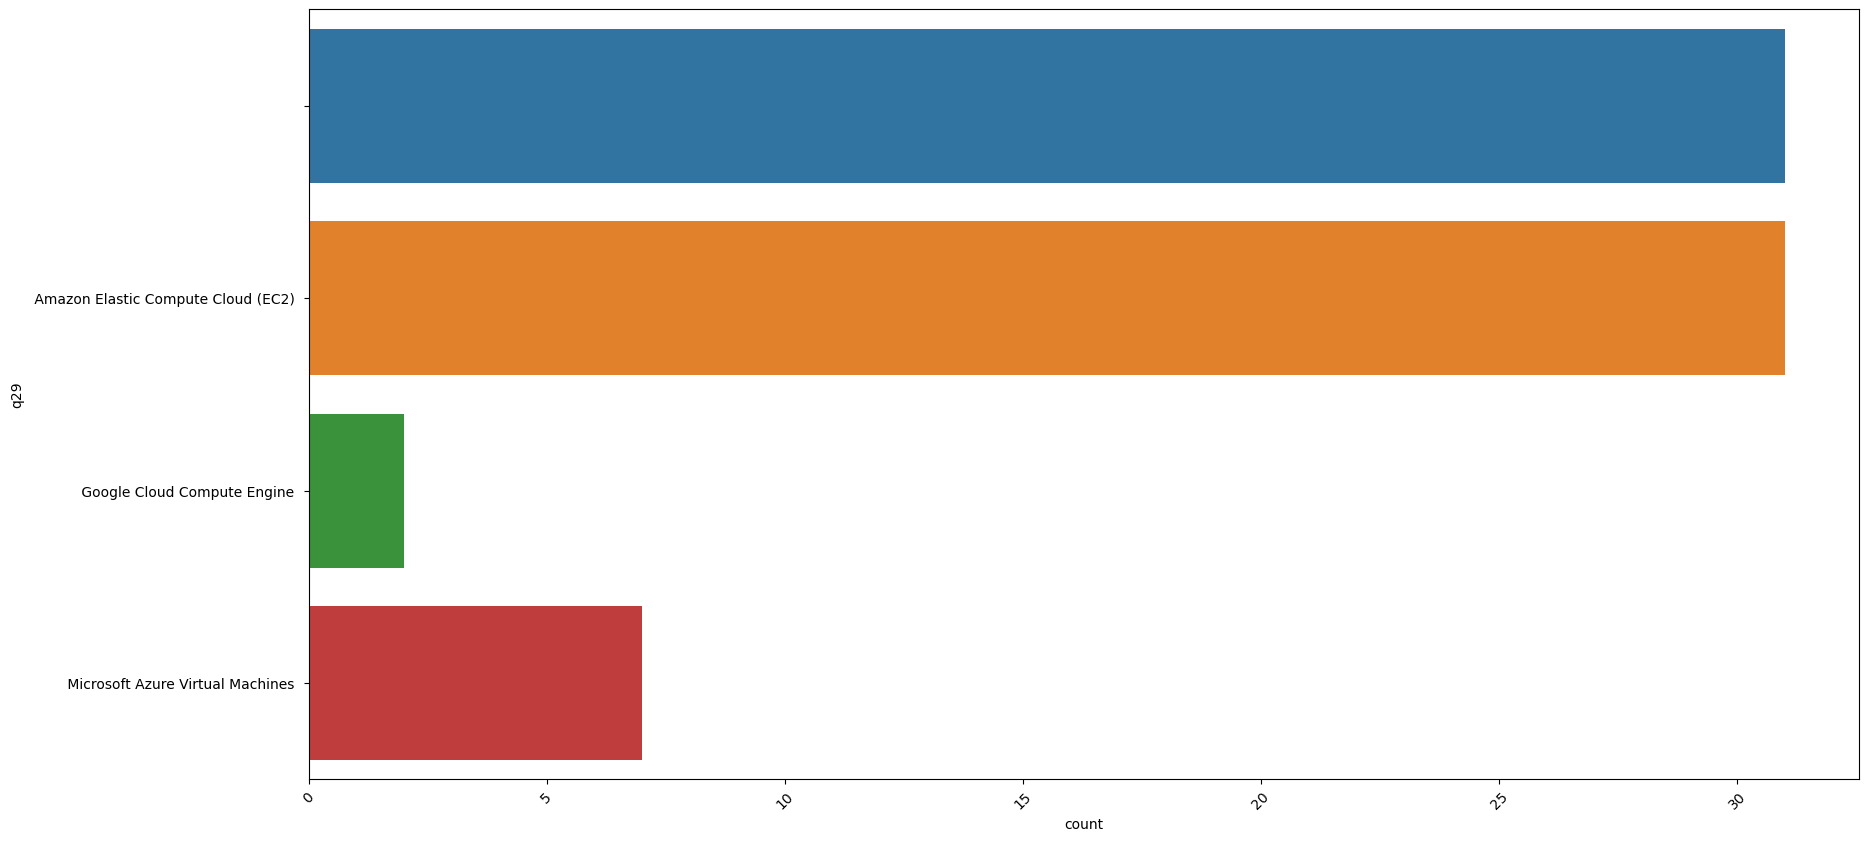

In [609]:
plt.figure(figsize=(20,10))
sns.barplot(x ='count', y = 'q29', data=df_29_gp)
plt.xticks(rotation = 45);

# Q30

In [610]:
df_q30=df['q30'].reset_index()
df_q30

,index,q30
0,32,NaN
1,46,NaN
2,66,NaN
3,102,NaN
4,108,NaN
...,...,...
746,25811,NaN
747,25819,NaN
748,25909,NaN
749,25916,NaN


In [611]:
df_q30['q30'] = df_q30['q30'].apply(quitar_comillas)
df_q30

,index,q30
0,32,None
1,46,None
2,66,None
3,102,None
4,108,None
...,...,...
746,25811,None
747,25819,None
748,25909,None
749,25916,None


In [612]:
df_30_explode = df_q30['q30'].explode().reset_index()
df_30_explode

,index,q30
0,0,None
1,1,None
2,2,None
3,3,None
4,4,None
...,...,...
786,746,None
787,747,None
788,748,None
789,749,None


In [613]:
df_30_gp = df_30_explode.groupby('q30').size()
df_30_gp

q30
                                         25
 Amazon Elastic File System (EFS)         1
 Amazon Simple Storage Service (S3)       2
Google Cloud Storage (GCS)                1
Microsoft Azure Data Lake Storage        25
Microsoft Azure Disk Storage             11
dtype: int64

In [614]:
df_30_gp= df_30_gp.reset_index(name='count')
df_30_gp

,q30,count
0,,25
1,Amazon Elastic File System (EFS),1
2,Amazon Simple Storage Service (S3),2
3,Google Cloud Storage (GCS),1
4,Microsoft Azure Data Lake Storage,25
5,Microsoft Azure Disk Storage,11


In [615]:
df_30_gp.drop(0, axis= 0,inplace=True)

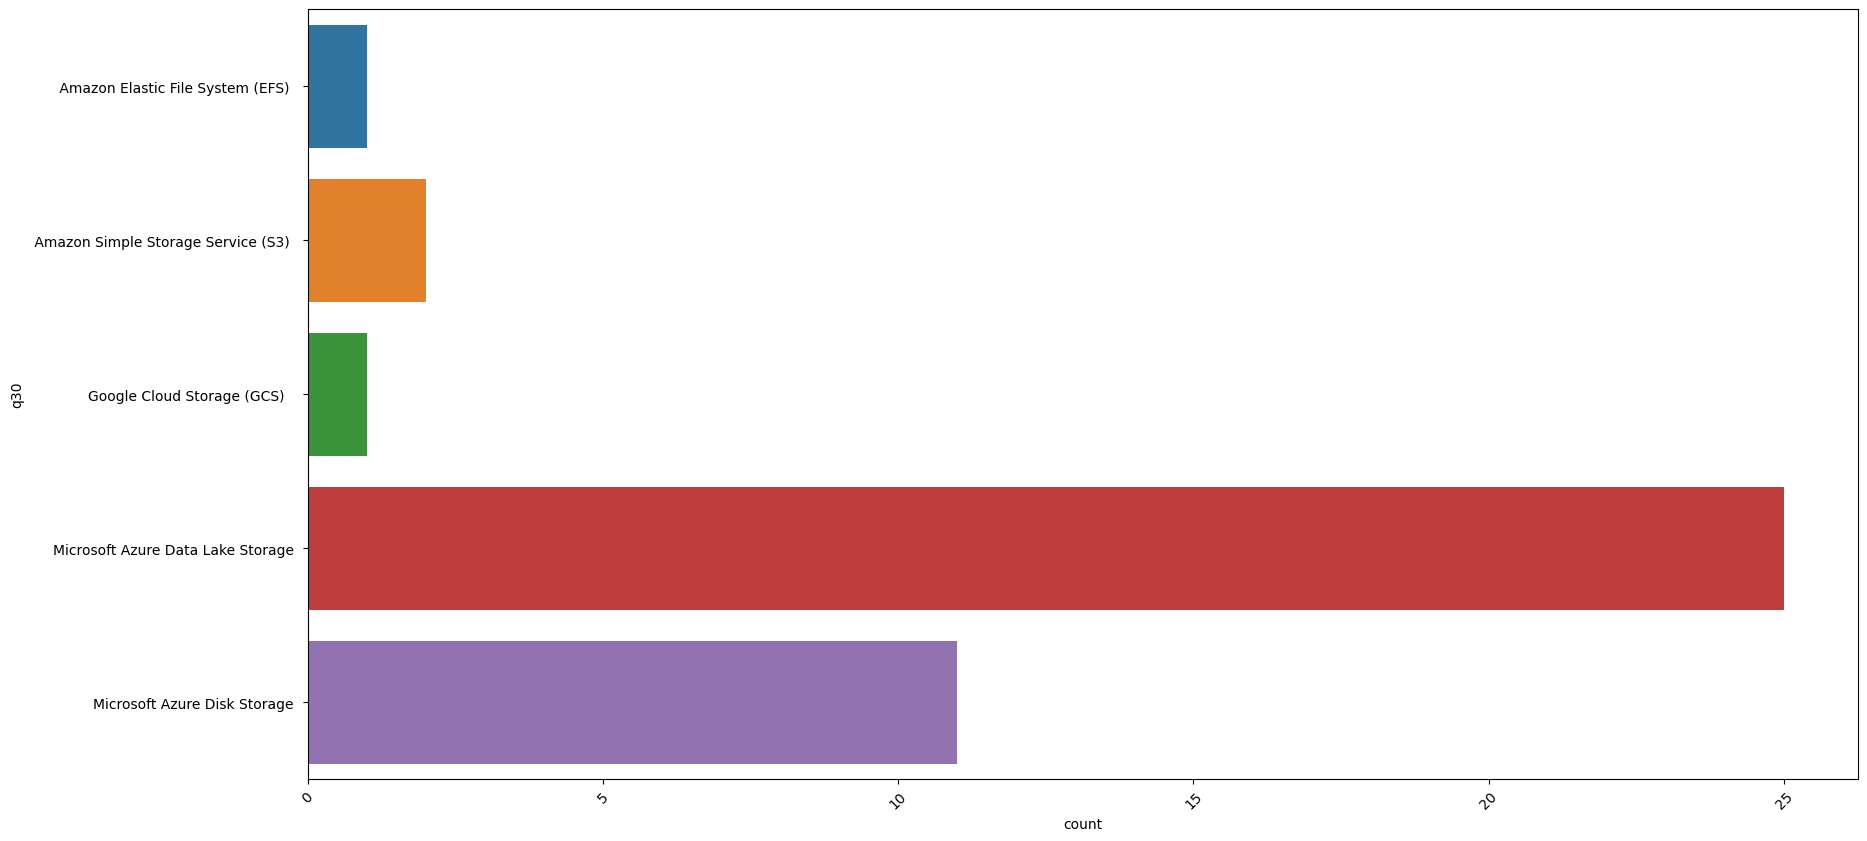

In [616]:
plt.figure(figsize=(20,10))
sns.barplot(x ='count', y = 'q30', data=df_30_gp)
plt.xticks(rotation = 45);

# Q31

In [617]:
df_q31=df['q31'].reset_index()
df_q31

,index,q31
0,32,NaN
1,46,NaN
2,66,NaN
3,102,NaN
4,108,NaN
...,...,...
746,25811,NaN
747,25819,NaN
748,25909,NaN
749,25916,NaN


In [618]:
df_q31['q31'] = df_q31['q31'].apply(quitar_comillas)
df_q31

,index,q31
0,32,None
1,46,None
2,66,None
3,102,None
4,108,None
...,...,...
746,25811,None
747,25819,None
748,25909,None
749,25916,None


In [619]:
df_31_explode = df_q31['q31'].explode().reset_index()
df_31_explode

,index,q31
0,0,None
1,1,None
2,2,None
3,3,None
4,4,None
...,...,...
764,746,None
765,747,None
766,748,None
767,749,None


In [620]:
df_31_gp = df_31_explode.groupby('q31').size()
df_31_gp

q31
                                   16
 Amazon SageMaker                  16
 Azure Machine Learning Studio      2
dtype: int64

In [621]:
df_31_gp= df_31_gp.reset_index(name='count')
df_31_gp.drop(0, axis= 0,inplace=True)
df_31_gp

,q31,count
1,Amazon SageMaker,16
2,Azure Machine Learning Studio,2


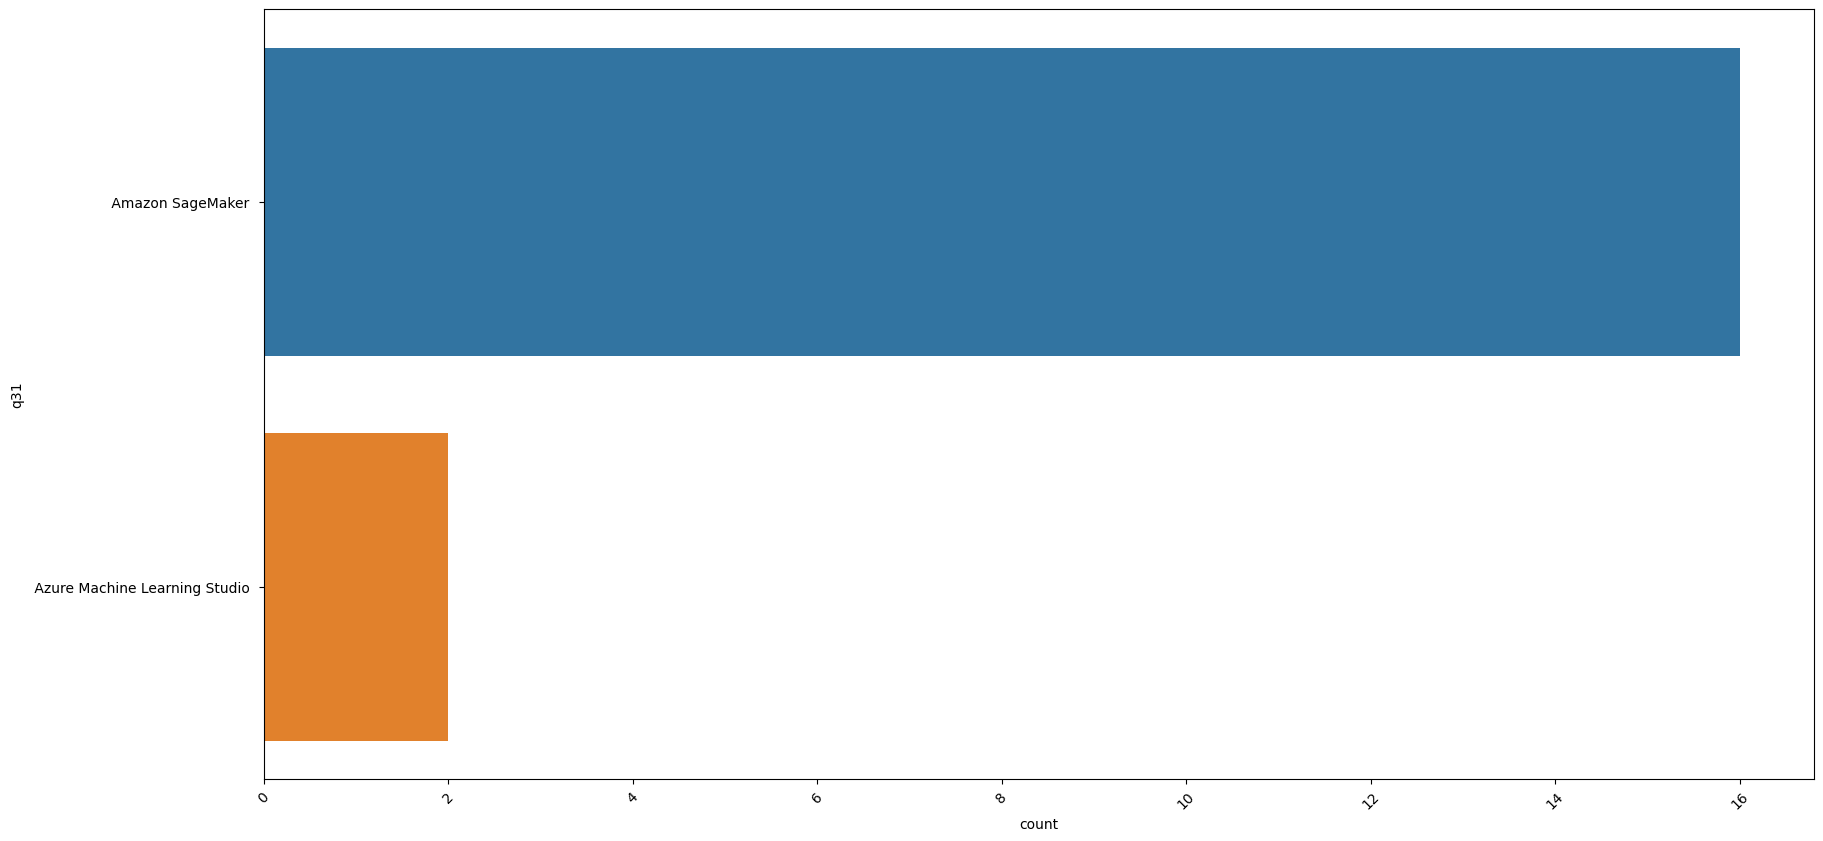

In [622]:
plt.figure(figsize=(20,10))
sns.barplot(x ='count', y = 'q31', data=df_31_gp)
plt.xticks(rotation = 45);

# q33
    Which of the following big data products (relational database, data warehouse, data lake, or similar)
do you use most often?
    Question 33 (which specific product) was only asked to respondents that selected more than one choice
for Question 32-A (which of the following products)

In [623]:
df_q33=df['q33'].reset_index()
df_q33

,index,q33
0,32,NaN
1,46,NaN
2,66,NaN
3,102,NaN
4,108,NaN
...,...,...
746,25811,NaN
747,25819,NaN
748,25909,NaN
749,25916,NaN


In [624]:
df_q33['q33'] = df_q33['q33'].apply(quitar_comillas)

In [625]:
df_q33_explode = df_q33['q33'].explode().reset_index()

In [626]:
gb_q33 = df_q33_explode.groupby('q33').size()

In [627]:
df_q33 = gb_q33.reset_index(name='count')

In [628]:
df_q33.head()

,q33,count
0,Amazon DynamoDB,1
1,Amazon Redshift,1
2,Google Cloud BigQuery,16
3,Google Cloud BigTable,2
4,Google Cloud Firestore,3


In [629]:
df_q33.drop(0, axis= 0,inplace=True)

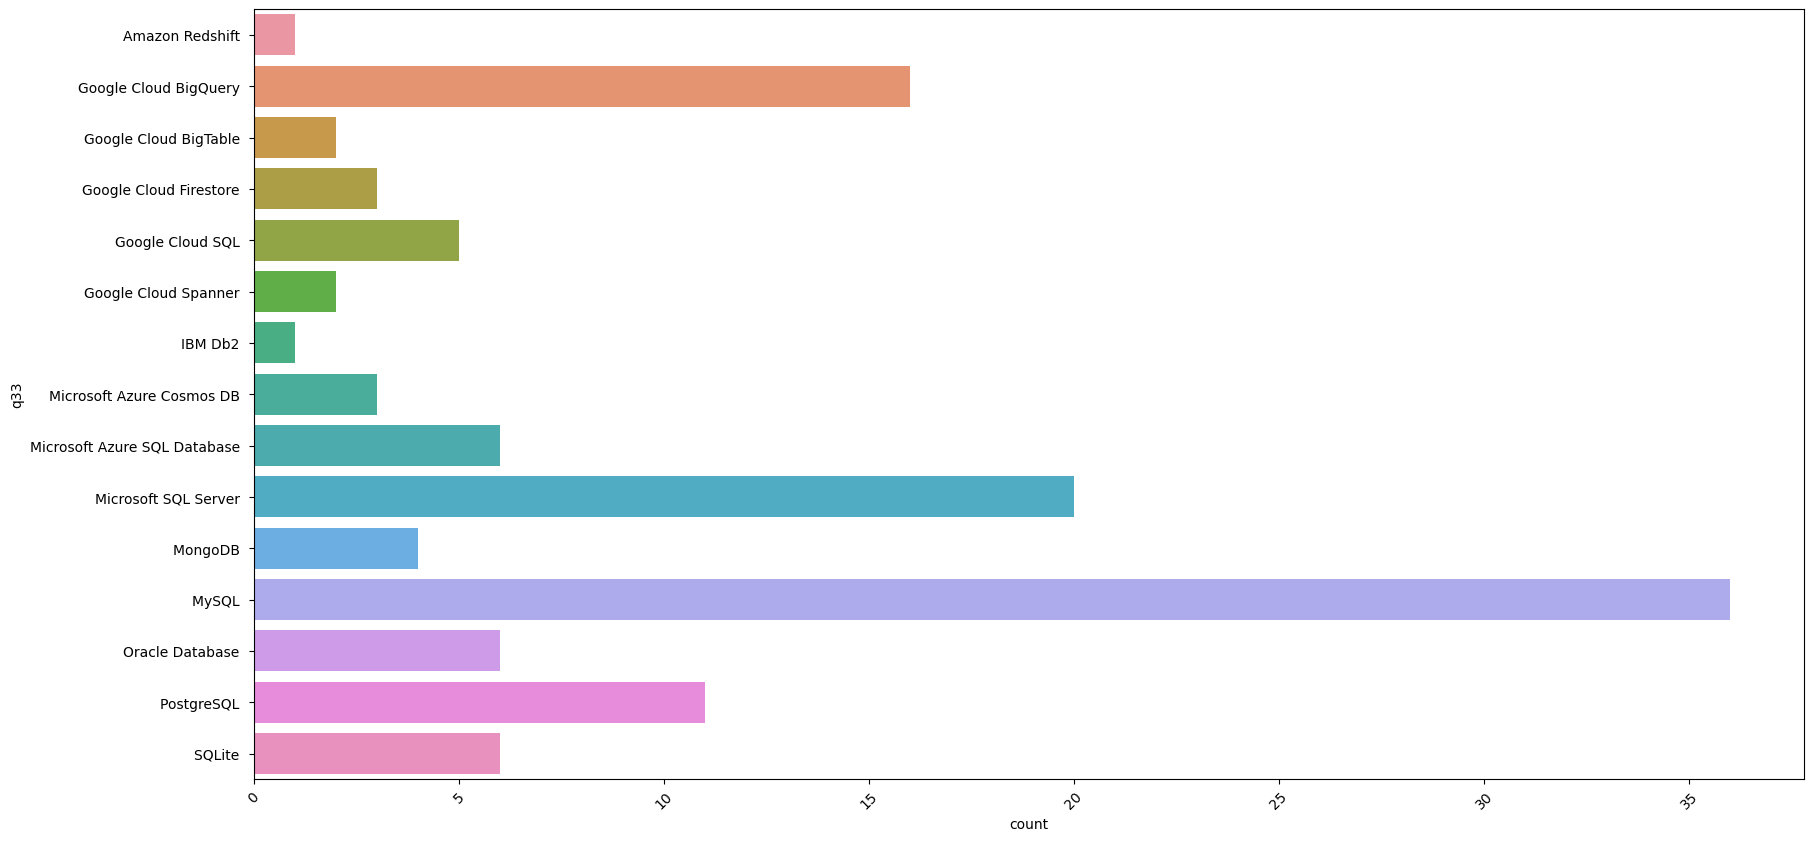

In [630]:
plt.figure(figsize=(20,10))
sns.barplot(x ='count', y = 'q33', data=df_q33)
plt.xticks(rotation = 45);

# q36
- Do you use any automated machine learning tools (or partial AutoML tools) on a regular basis?

In [631]:
df_q36=df['q36'].reset_index()
df_q36

,index,q36
0,32,NaN
1,46,NaN
2,66,NaN
3,102,NaN
4,108,NaN
...,...,...
746,25811,NaN
747,25819,NaN
748,25909,NaN
749,25916,NaN


In [632]:
df_q36['q36'] = df_q36['q36'].apply(quitar_comillas)

In [633]:
df_q36_explode = df_q36['q36'].explode().reset_index()

In [634]:
gb_q36 = df_q36_explode.groupby('q36').size() #aqui tenemos todos los espacios, que se tienen que desestimar 
#para la creacion de las graficas

In [635]:
df_q36 = gb_q36.reset_index(name='count')

In [636]:
df_q36.head()

,q36,count
0,,26
1,"Automated data augmentation (e.g. imgaug, albu...",26
2,Automated feature engineering/selection (e.g. ...,5
3,Automated hyperparameter tuning (e.g. hyperopt...,1
4,Automated model architecture searches (e.g. da...,1


In [637]:
df_q36.drop(0, axis= 0,inplace=True)

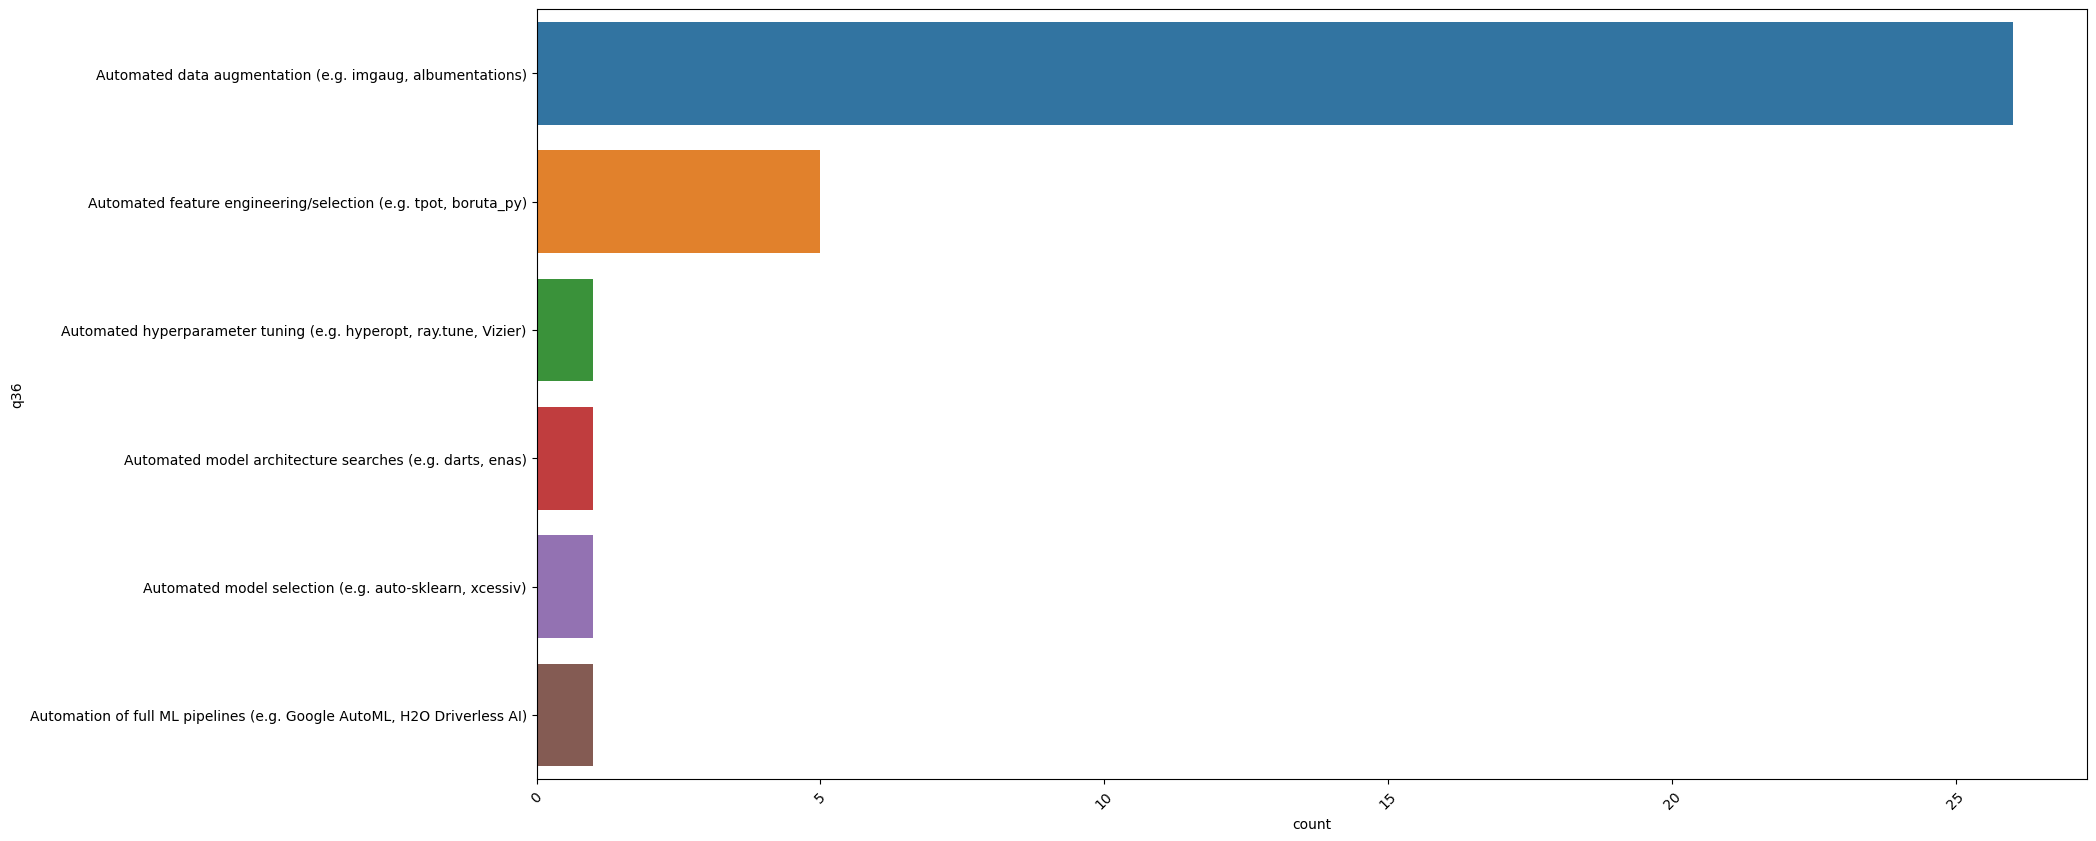

In [638]:
plt.figure(figsize=(20,10))
sns.barplot(x ='count', y = 'q36', data=df_q36)
plt.xticks(rotation = 45);

# q37
- Which of the following automated machine learning tools (or partial AutoML tools) do you use on a regular basis? (Select all that apply).

- Question 37-A (which specific product) was only asked to respondents that answered affirmatively to  Question 36-A (which of the following categories of products)

In [639]:
df_q37=df['q37'].reset_index()
df_q37

,index,q37
0,32,NaN
1,46,NaN
2,66,NaN
3,102,NaN
4,108,NaN
...,...,...
746,25811,NaN
747,25819,NaN
748,25909,NaN
749,25916,NaN


In [640]:
df_q37['q37'] = df_q37['q37'].apply(quitar_comillas)

In [641]:
df_q37_explode = df_q37['q37'].explode().reset_index()

In [642]:
gb_q37 = df_q37_explode.groupby('q37').size()

In [643]:
df_q37 = gb_q37.reset_index(name='count')

In [644]:
df_q37.head()

,q37,count
0,,18
1,Google Cloud AutoML,18


In [645]:
df_q37.drop(0, axis= 0,inplace=True)

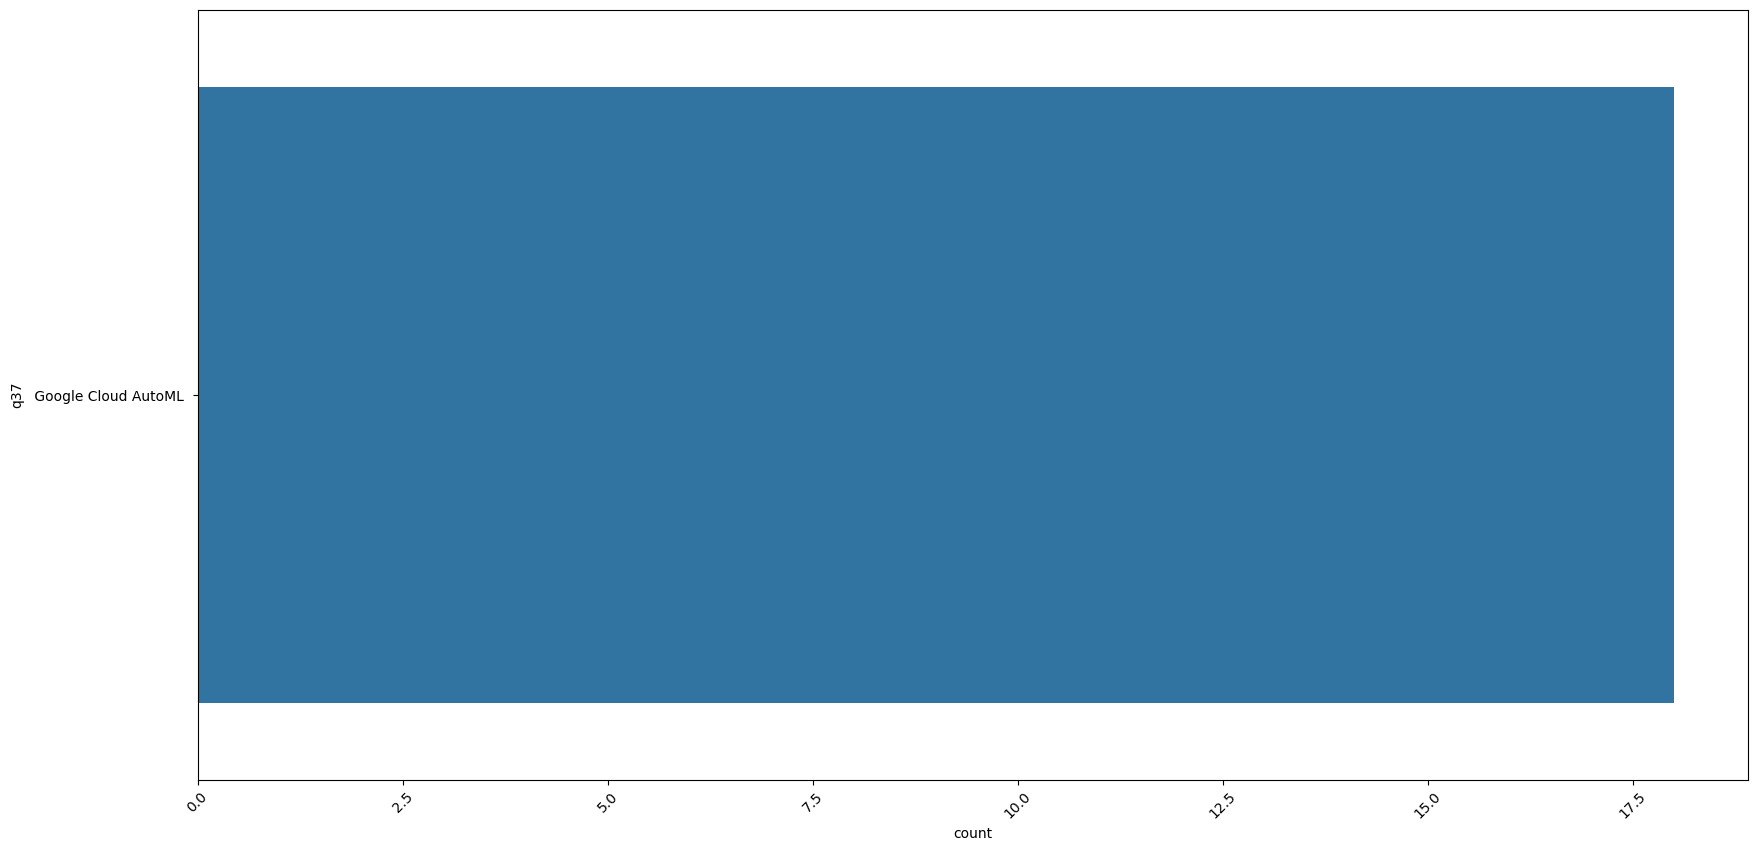

In [646]:
plt.figure(figsize=(20,10))
sns.barplot(x ='count', y = 'q37', data=df_q37)
plt.xticks(rotation = 45);

# q38
- Do you use any tools to help manage machine learning experiments? (Select all that apply)

In [647]:
df_q38=df['q38'].reset_index()
df_q38

,index,q38
0,32,NaN
1,46,NaN
2,66,NaN
3,102,NaN
4,108,NaN
...,...,...
746,25811,NaN
747,25819,NaN
748,25909,NaN
749,25916,NaN


In [648]:
df_q38['q38'] = df_q38['q38'].apply(quitar_comillas)

In [649]:
df_q38_explode = df_q38['q38'].explode().reset_index()

In [650]:
gb_q38 = df_q38_explode.groupby('q38').size()

In [651]:
df_q38 = gb_q38.reset_index(name='count')

In [652]:
df_q38.head()

,q38,count
0,,6
1,Neptune.ai,6
2,Weights & Biases,2


In [653]:
df_q38.drop(0, axis= 0,inplace=True)

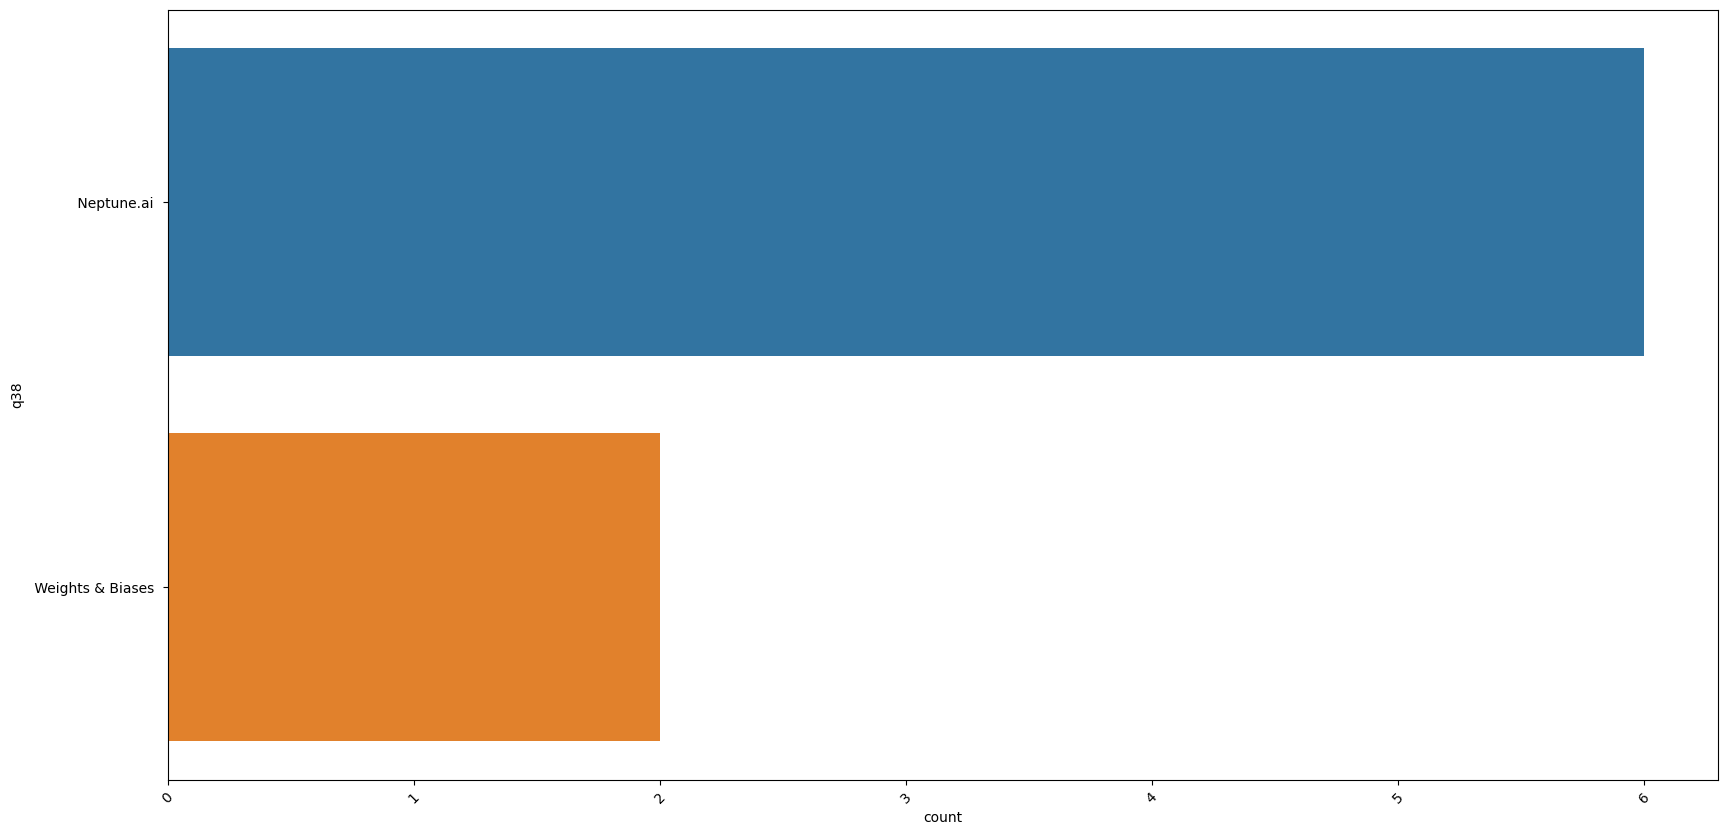

In [654]:
plt.figure(figsize=(20,10))
sns.barplot(x ='count', y = 'q38', data=df_q38)
plt.xticks(rotation = 45);

# q39

In [655]:
df_q39=df['q39'].reset_index()
df_q39

,index,q39
0,32,NaN
1,46,NaN
2,66,NaN
3,102,NaN
4,108,NaN
...,...,...
746,25811,NaN
747,25819,NaN
748,25909,NaN
749,25916,NaN


In [656]:
df_q39['q39'] = df_q39['q39'].apply(quitar_comillas)

In [657]:
df_39_explode = df_q39['q39'].explode().reset_index()

In [658]:
df_39_explode

,index,q39
0,0,None
1,1,None
2,2,None
3,3,None
4,4,None
...,...,...
753,746,None
754,747,None
755,748,None
756,749,None


In [659]:
df_39_explode['q39'].unique()

array([None, ' Plotly Dash ', ''], dtype=object)

In [660]:
gb39 = df_39_explode.groupby('q39').size() #aqui tenemos todos los espacios, que se tienen que desestimar 
#para la creacion de las graficas

In [661]:
df_q39 = gb39.reset_index(name='count')

In [662]:
df_q39

,q39,count
0,,7
1,Plotly Dash,7


In [663]:
df_q39.drop(0, axis= 0,inplace=True)

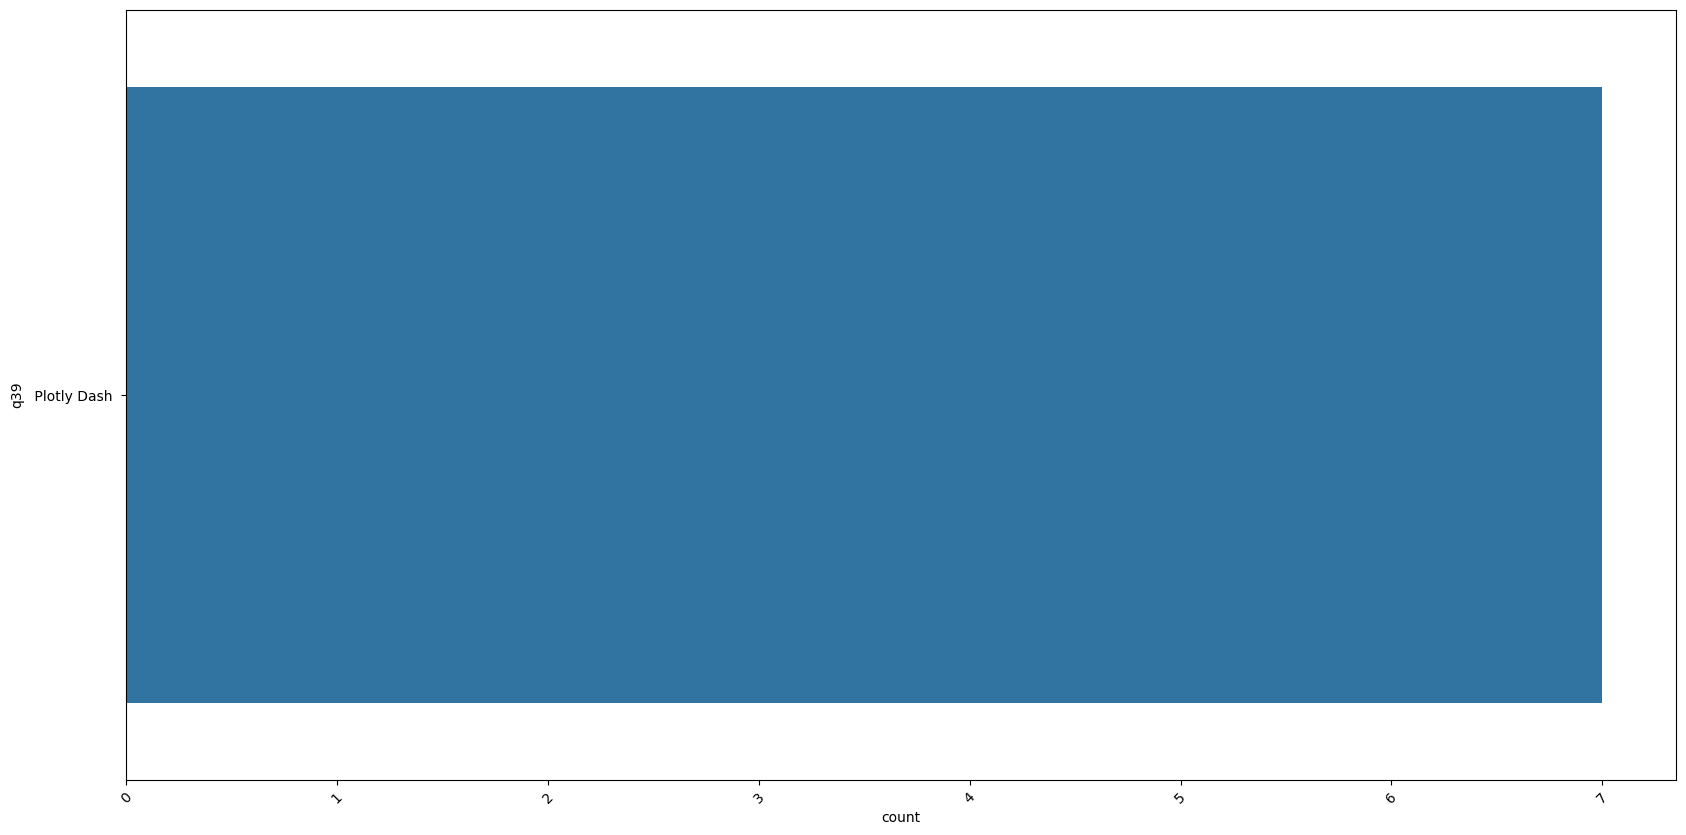

In [664]:
plt.figure(figsize=(20,10))
sns.barplot(x ='count', y = 'q39', data=df_q39)
plt.xticks(rotation = 45);

# q40

In [665]:
df_q40=df['q40'].reset_index()
df_q40

,index,q40
0,32,NaN
1,46,Coursera?edX?Kaggle Learn Courses?
2,66,NaN
3,102,Coursera?
4,108,Coursera?
...,...,...
746,25811,Coursera?
747,25819,Coursera?
748,25909,NaN
749,25916,Coursera?


In [666]:
df_q40['q40'] = df_q40['q40'].apply(quitar_comillas)

In [667]:
df_40_explode = df_q40['q40'].explode().reset_index()

In [668]:
df_40_explode

,index,q40
0,0,None
1,1,Coursera
2,1,edX
3,1,Kaggle Learn Courses
4,1,
...,...,...
1097,748,None
1098,749,Coursera
1099,749,
1100,750,Coursera


In [669]:
df_40_explode['q40'].unique()

array([None, 'Coursera', 'edX', 'Kaggle Learn Courses', '', 'DataCamp',
       'Fast.ai', 'Udacity'], dtype=object)

In [670]:
gb40 = df_40_explode.groupby('q40').size() #aqui tenemos todos los espacios, que se tienen que desestimar 
#para la creacion de las graficas

In [671]:
df_q40 = gb40.reset_index(name='count')

In [672]:
df_q40

,q40,count
0,,246
1,Coursera,246
2,DataCamp,14
3,Fast.ai,1
4,Kaggle Learn Courses,32
5,Udacity,1
6,edX,57


In [673]:
df_q40.drop(0, axis= 0,inplace=True)

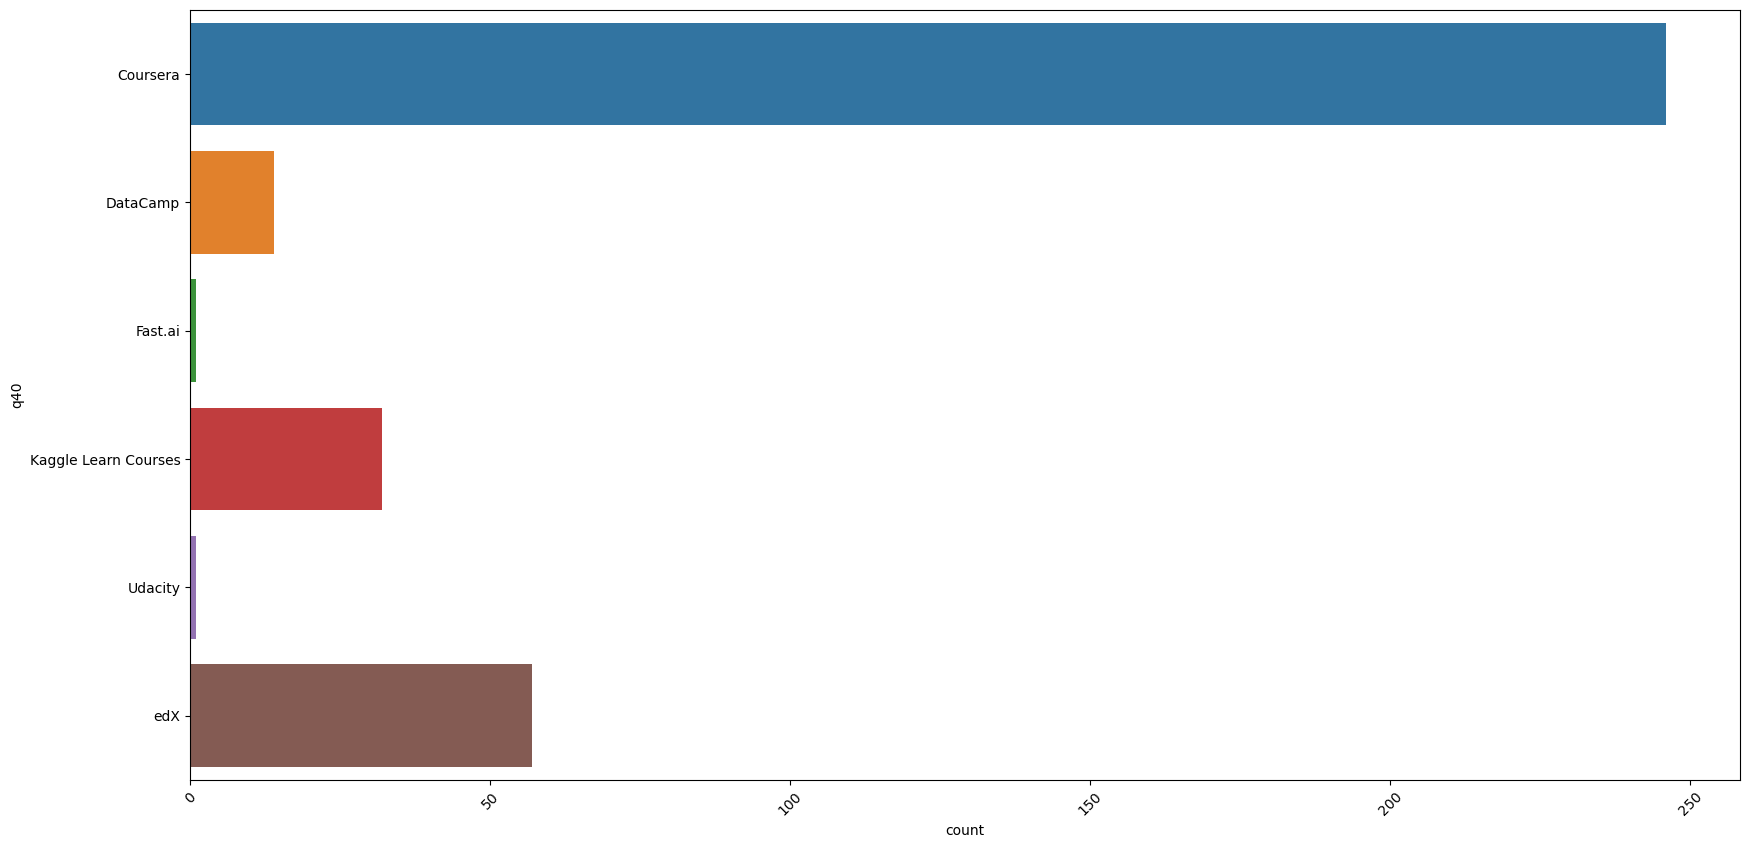

In [674]:
plt.figure(figsize=(20,10))
sns.barplot(x ='count', y = 'q40', data=df_q40)
plt.xticks(rotation = 45);

# q42

In [675]:
df_q42=df['q42'].reset_index()
df_q42

,index,q42
0,32,NaN
1,46,Twitter (data science influencers)?
2,66,NaN
3,102,NaN
4,108,NaN
...,...,...
746,25811,Twitter (data science influencers)?Email newsl...
747,25819,NaN
748,25909,NaN
749,25916,NaN


In [676]:
df_q42['q42'] = df_q42['q42'].apply(quitar_comillas)

In [677]:
df_42_explode = df_q42['q42'].explode().reset_index()

In [678]:
df_42_explode

,index,q42
0,0,None
1,1,Twitter (data science influencers)
2,1,
3,2,None
4,3,None
...,...,...
866,746,
867,747,None
868,748,None
869,749,None


In [679]:
df_42_explode['q42'].unique()

array([None, 'Twitter (data science influencers)', '',
       "Email newsletters (Data Elixir, O'Reilly Data & AI, etc)",
       'Reddit (r/machinelearning, etc)',
       'Kaggle (notebooks, forums, etc)',
       'Course Forums (forums.fast.ai, Coursera forums, etc)',
       'YouTube (Kaggle YouTube, Cloud AI Adventures, etc)',
       'Podcasts (Chai Time Data Science, O’Reilly Data Show, etc)',
       'Blogs (Towards Data Science, Analytics Vidhya, etc)',
       'Journal Publications (peer-reviewed journals, conference proceedings, etc)',
       'Slack Communities (ods.ai, kagglenoobs, etc)'], dtype=object)

In [680]:
gb42 = df_42_explode.groupby('q42').size() #aqui tenemos todos los espacios, que se tienen que desestimar 
#para la creacion de las graficas

In [681]:
df_q42 = gb42.reset_index(name='count')

In [682]:
df_q42

,q42,count
0,,81
1,"Blogs (Towards Data Science, Analytics Vidhya,...",2
2,"Course Forums (forums.fast.ai, Coursera forums...",3
3,"Email newsletters (Data Elixir, O'Reilly Data ...",20
4,"Journal Publications (peer-reviewed journals, ...",1
5,"Kaggle (notebooks, forums, etc)",3
6,"Podcasts (Chai Time Data Science, O’Reilly Dat...",2
7,"Reddit (r/machinelearning, etc)",4
8,"Slack Communities (ods.ai, kagglenoobs, etc)",1
9,Twitter (data science influencers),81


In [683]:
df_q42.drop(0, axis= 0,inplace=True)

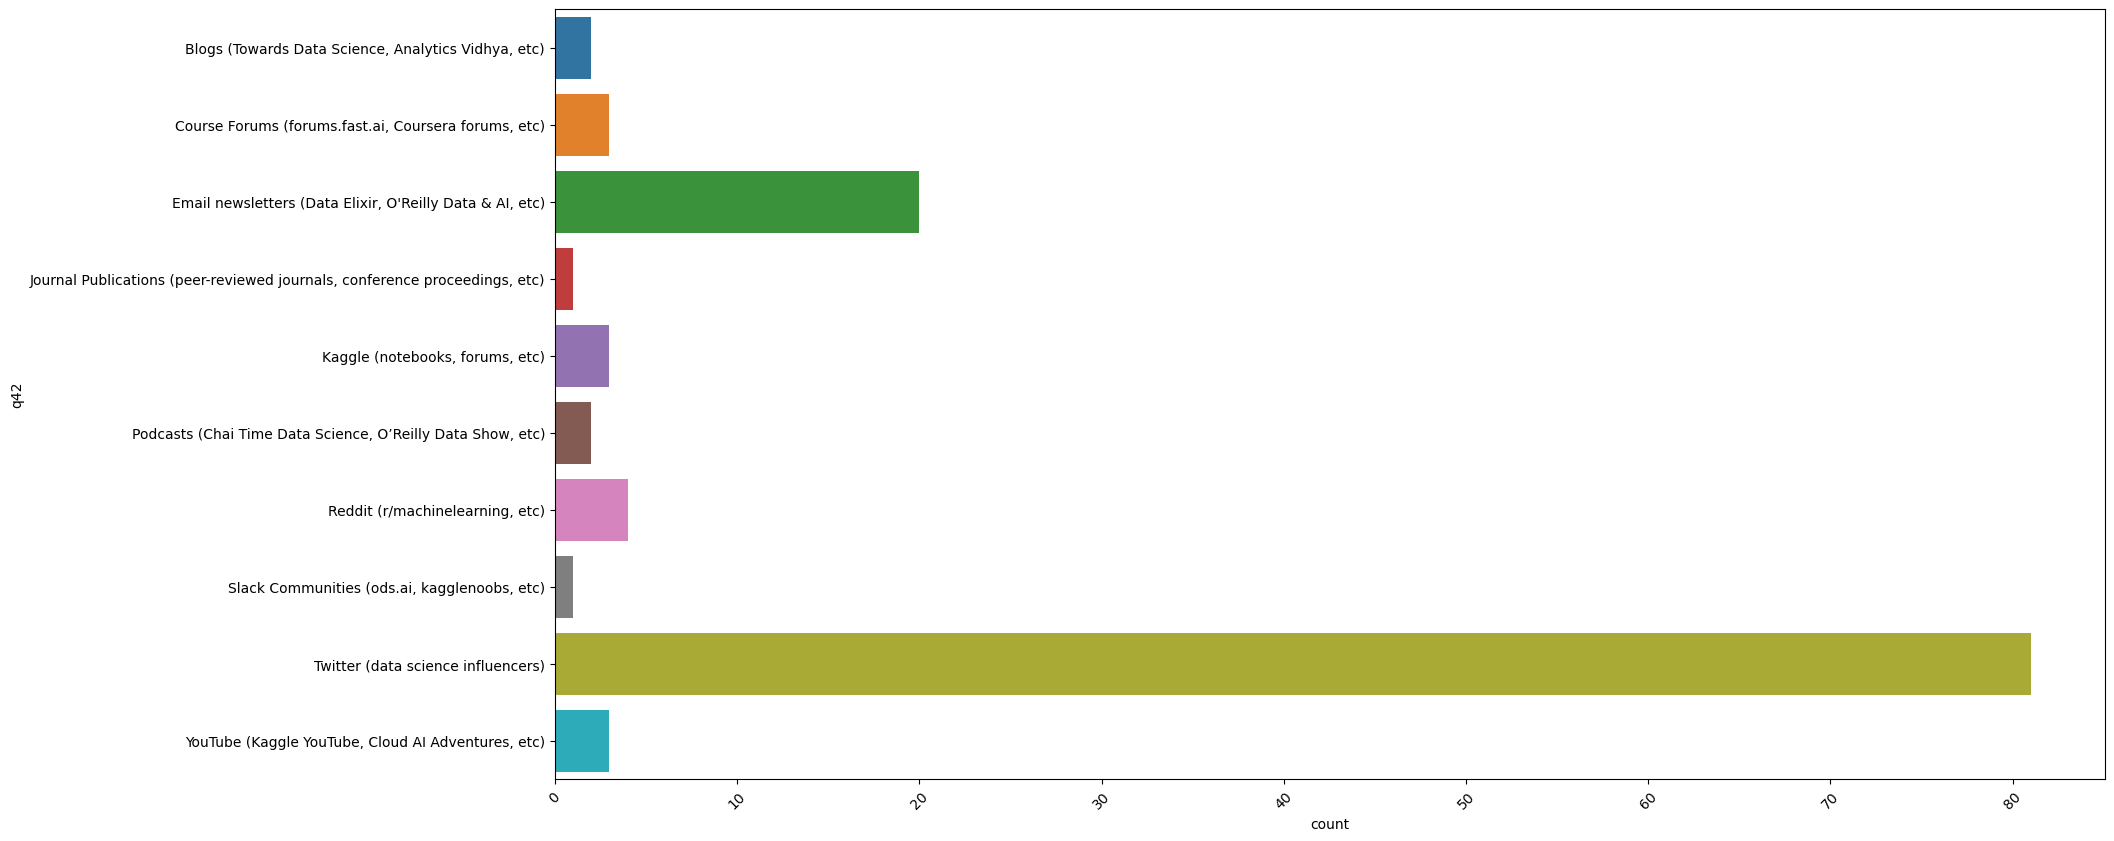

In [684]:
plt.figure(figsize=(20,10))
sns.barplot(x ='count', y = 'q42', data=df_q42)
plt.xticks(rotation = 45);

 - q10:"notebook_products" 
 - q18:"vision_methods"
 - q19:"nlp"
 - q27:"cloud_platforms"
 - q29:"cloud_products"
 - q30:"data_storage_products"
 - q31:"ml_products"
 - q32:"bd_products"
 - q34:"bi_tools"
 - q36:"auto_ml"
 - q37:"aml_tools"
 - q38:"ml_experiment_tools"
 - q39:"share_app"
 - q40:"platform_courses_ds"
 - q42:"media_sources"


# Relación entre variables

q7

In [685]:
df_q7=df['q7'].reset_index()
df_q7

,index,q7
0,32,R
1,46,"Python, SQL, C, C++, Java, Javascript, MATLAB"
2,66,Python
3,102,Python
4,108,"Python, SQL"
...,...,...
746,25811,"Python, SQL"
747,25819,SQL
748,25909,"Python, SQL"
749,25916,"Python, SQL"


In [686]:
df_q7['q7'] = df_q7['q7'].apply(quitar_comillas)

In [687]:
df_7_explode = df_q7['q7'].explode().reset_index()

In [688]:
gb7 = df_7_explode.groupby('q7').size()

In [689]:
df_q7 = gb7.reset_index(name='count')

In [690]:
df_q7.drop(0, axis= 0,inplace=True)

q5

In [691]:
df_completo = pd.read_csv('./datos/HU2.csv', index_col = 0)
df_completo.head()

,index,q3,q5,q6,q8,q11,q13,q15,q23,q33,q41,q7,q9,q12,q14,q16,q17,q24,q28,q10,q18,q19,q27,q29,q30,q31,q36,q37,q38,q39,q40,q42
0,0,India,Other,5-10 years,Python,A laptop,2-5 times,5-10 years,No (we do not use ML methods),NaN,"Local development environments (RStudio, Jupyt...","Python, R",Vim / Emacs,Google Cloud TPUs,"Matplotlib ,Seaborn ,Ggplot / ggplot2 ,Shiny ...","Scikit-learn , TensorFlow ,Caret","Linear or Logistic Regression, Decision Trees ...",None of these activities are an important par...,NaN,NaN,"General purpose image/video tools (PIL, cv2, s...","Word embeddings/vectors (GLoVe, fastText, word...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Coursera?edX?Kaggle Learn Courses?DataCamp?,NaN
1,1,Indonesia,Program/Project Manager,20+ years,Python,"A cloud computing platform (AWS, Azure, GCP, h...",Never,< 1 year,We are exploring ML methods (and may one day p...,NaN,"Advanced statistical software (SPSS, SAS, etc.)","SQL, C, C++, Java","Notepad++,Jupyter Notebook",None,Matplotlib,Scikit-learn,"Linear or Logistic Regression, Decision Trees ...",Build and/or run the data infrastructure that...,NaN,Kaggle Notebooks?Colab Notebooks?,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Pakistan,Software Engineer,1-3 years,Python,A laptop,Never,I do not use machine learning methods,I do not know,MySQL,"Basic statistical software (Microsoft Excel, G...","Python, C++, Java","PyCharm ,Jupyter Notebook, Other",Other,Matplotlib,NaN,NaN,None of these activities are an important par...,NaN,Kaggle Notebooks?,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Mexico,Research Scientist,20+ years,Python,"A cloud computing platform (AWS, Azure, GCP, h...",More than 25 times,5-10 years,I do not know,NaN,"Local development environments (RStudio, Jupyt...",Python,"Spyder,Jupyter Notebook",NVIDIA GPUs,Matplotlib,"Scikit-learn , TensorFlow ,Keras","Dense Neural Networks (MLPs, etc), Convolutio...",Do research that advances the state of the ar...,NaN,NaN,"General purpose image/video tools (PIL, cv2, s...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Coursera?edX?,NaN
4,4,India,Other,< 1 years,Python,"A cloud computing platform (AWS, Azure, GCP, h...",Never,10-20 years,We use ML methods for generating insights (but...,NaN,"Local development environments (RStudio, Jupyt...","Python, C, MATLAB","Spyder,MATLAB ,Jupyter Notebook",None,"Matplotlib ,Seaborn ,Ggplot / ggplot2","Scikit-learn ,PyTorch ,LightGBM","Linear or Logistic Regression, Decision Trees ...",Analyze and understand data to influence produ...,NaN,NaN,NaN,NaN,NaN,NaN,Microsoft Azure Data Lake Storage ?,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [692]:
df_q5=df_completo['q5'].reset_index()
df_q5

,index,q5
0,0,Other
1,1,Program/Project Manager
2,2,Software Engineer
3,3,Research Scientist
4,4,Other
...,...,...
25968,25968,Data Analyst
25969,25969,Student
25970,25970,Research Scientist
25971,25971,Data Scientist


In [693]:
df_q5['q5'] = df_q5['q5'].apply(quitar_comillas)

In [694]:
df_5_explode = df_q5['q5'].explode().reset_index()

In [695]:
gb5 = df_5_explode.groupby('q5').size()

In [696]:
df_q5 = gb5.reset_index(name='count')

In [697]:
df_q5.drop(0, axis= 0,inplace=True)

q9

In [698]:
df_q9=df['q9'].reset_index()
df_q9

,index,q9
0,32,RStudio
1,46,"Jupyter (JupyterLab, Jupyter Notebooks, etc) ,..."
2,66,"PyCharm , Spyder"
3,102,"Jupyter (JupyterLab, Jupyter Notebooks, etc) ,..."
4,108,"Jupyter Notebook, Other"
...,...,...
746,25811,"PyCharm , Vim / Emacs,Jupyter Notebook"
747,25819,Visual Studio
748,25909,Jupyter Notebook
749,25916,Jupyter Notebook


In [699]:
df_q9['q9'] = df_q9['q9'].apply(quitar_comillas)

In [700]:
df_9_explode = df_q9['q9'].explode().reset_index()

In [701]:
gb9 = df_9_explode.groupby('q9').size()

In [702]:
df_q9 = gb9.reset_index(name='count')

In [703]:
df_q9.drop(0, axis= 0,inplace=True)

q11

In [704]:
df_q11=df['q11'].reset_index()
df_q11

,index,q11
0,32,A personal computer / desktop
1,46,A personal computer / desktop
2,66,A laptop
3,102,A laptop
4,108,A personal computer / desktop
...,...,...
746,25811,A laptop
747,25819,A laptop
748,25909,A laptop
749,25916,A laptop


In [705]:
df_q11['q11'] = df_q11['q11'].apply(quitar_comillas)

In [706]:
df_11_explode = df_q11['q11'].explode().reset_index()

In [707]:
gb11 = df_11_explode.groupby('q11').size()

In [708]:
df_q11 = gb11.reset_index(name='count')

In [709]:
df_q11.drop(0, axis= 0,inplace=True)

[Text(0, 0.5, 'Roles'), Text(0.5, 0, 'Conteo')]

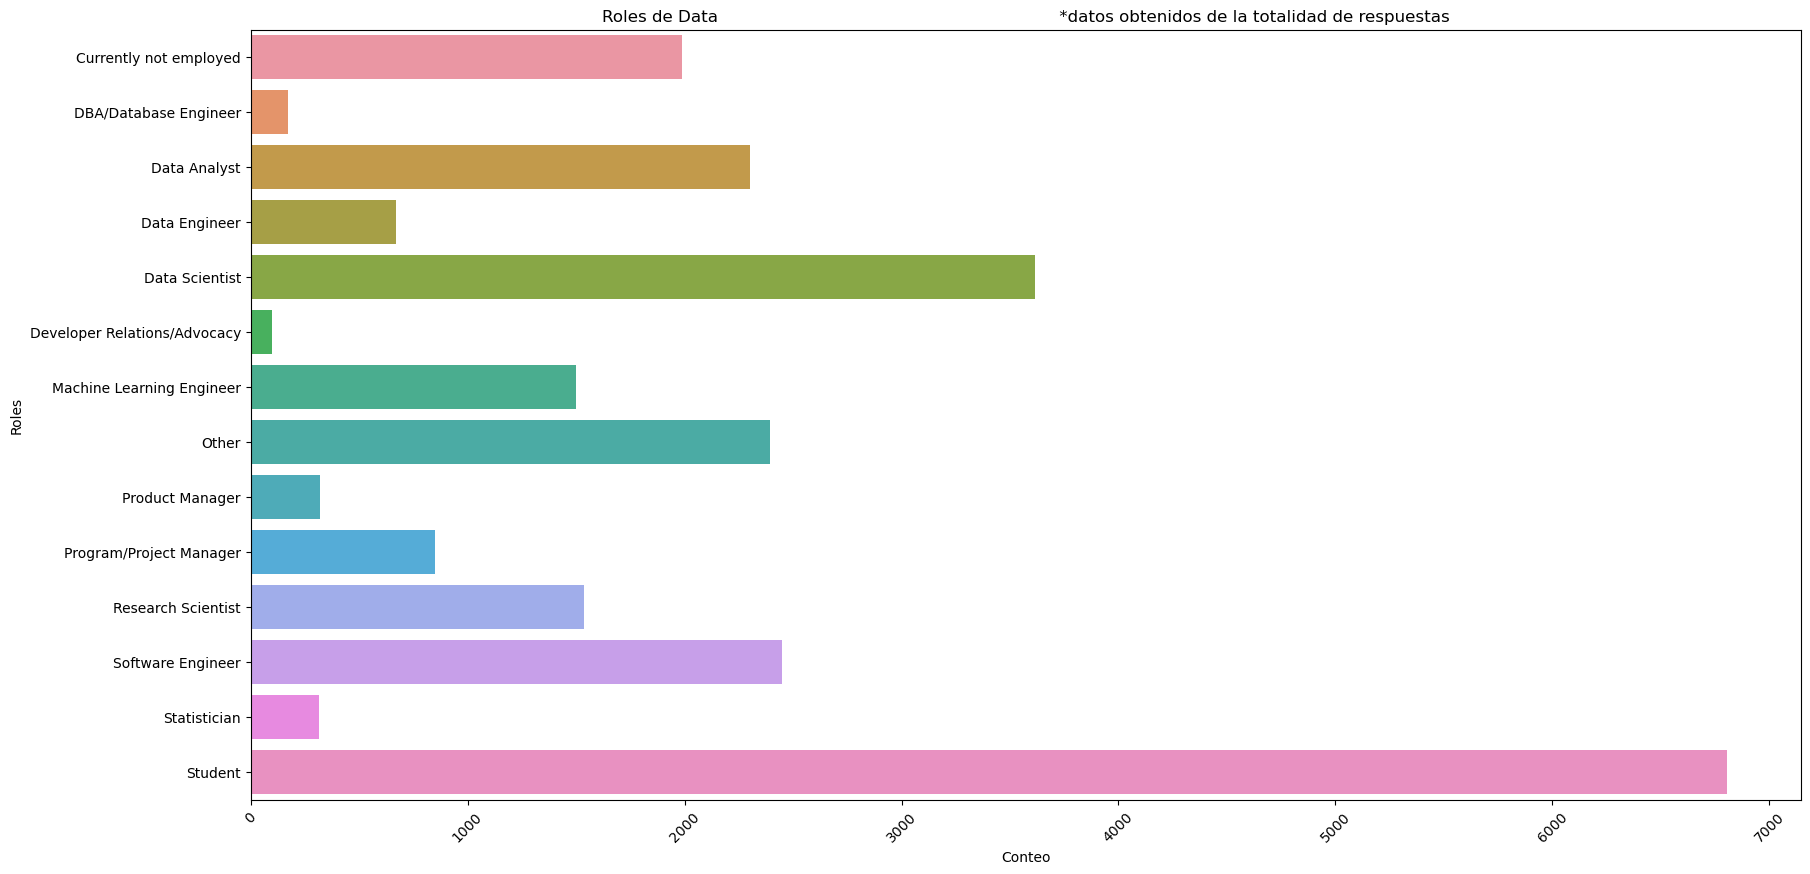

In [710]:
plt.figure(figsize=(20,10))
fig= sns.barplot(x ='count', y='q5', data=df_q5)
plt.title('Roles de Data                                                                 *datos obtenidos de la totalidad de respuestas')
plt.xticks(rotation = 45)
fig.set(ylabel='Roles', xlabel= 'Conteo')

[Text(0, 0.5, 'Lenguajes'), Text(0.5, 0, 'Conteo')]

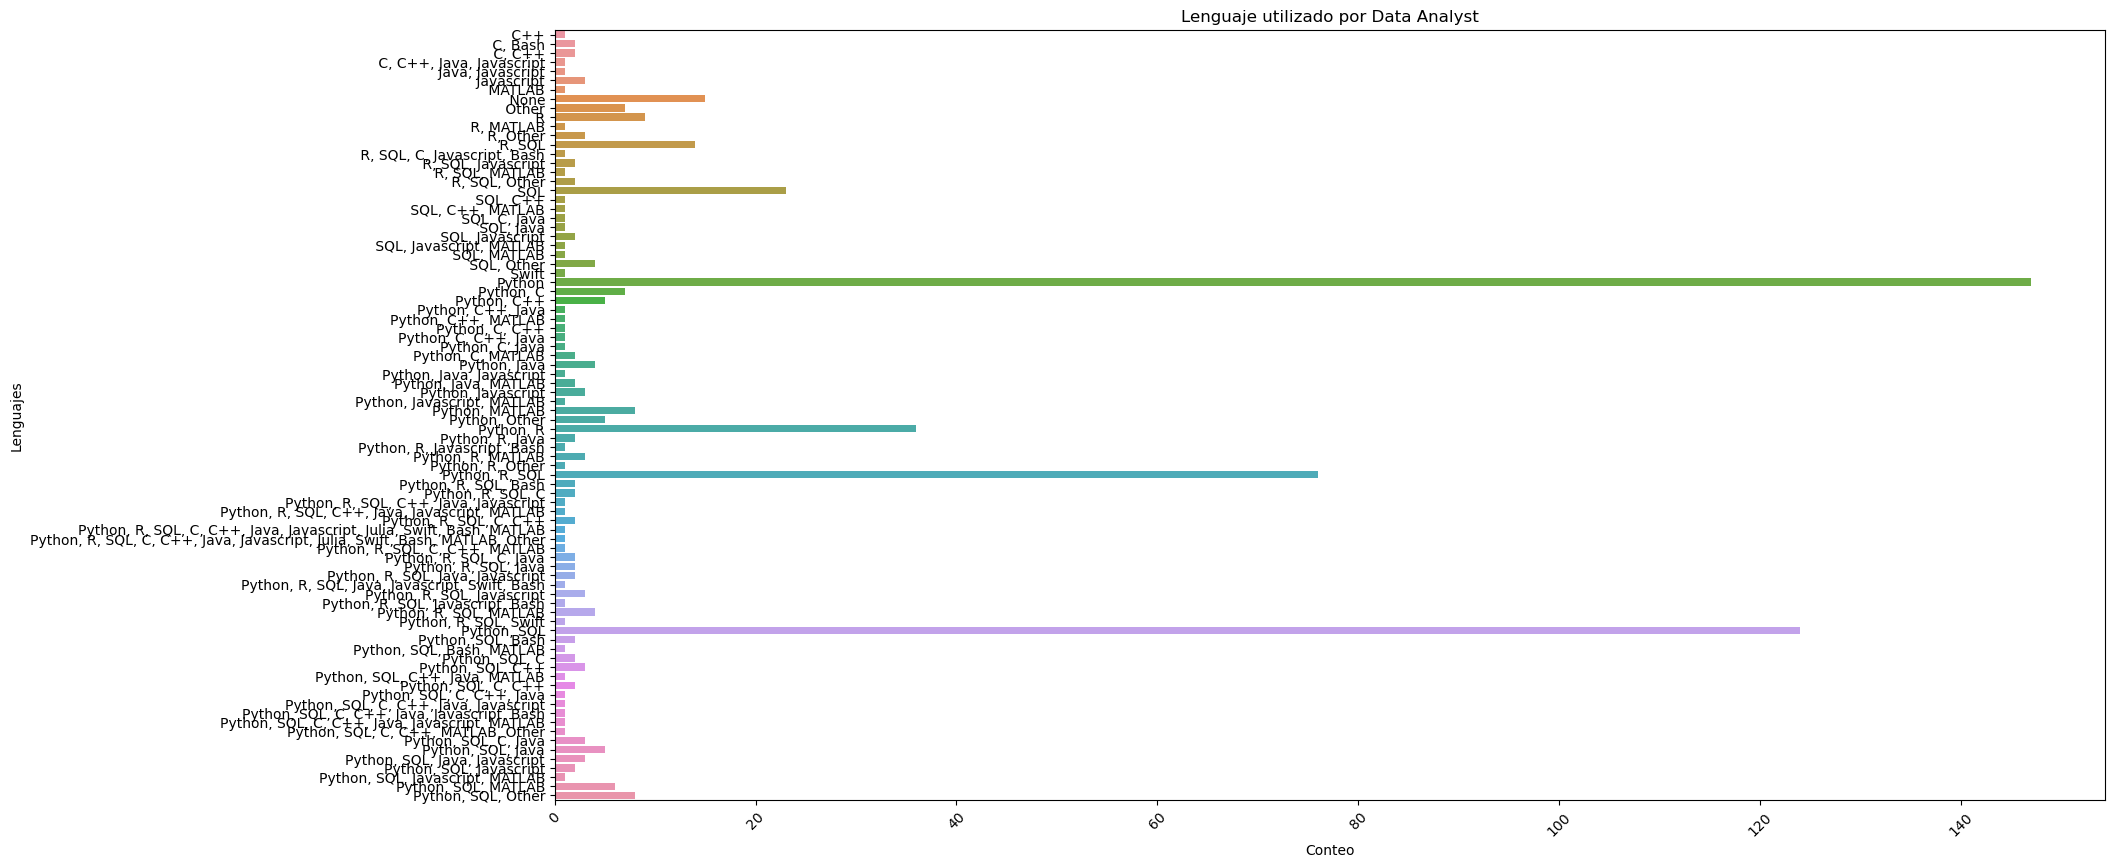

In [711]:
plt.figure(figsize=(20,10))
fig= sns.barplot(x ='count', y='q7', data=df_q7)
plt.title('Lenguaje utilizado por Data Analyst')
plt.xticks(rotation = 45)
fig.set(ylabel='Lenguajes', xlabel= 'Conteo')

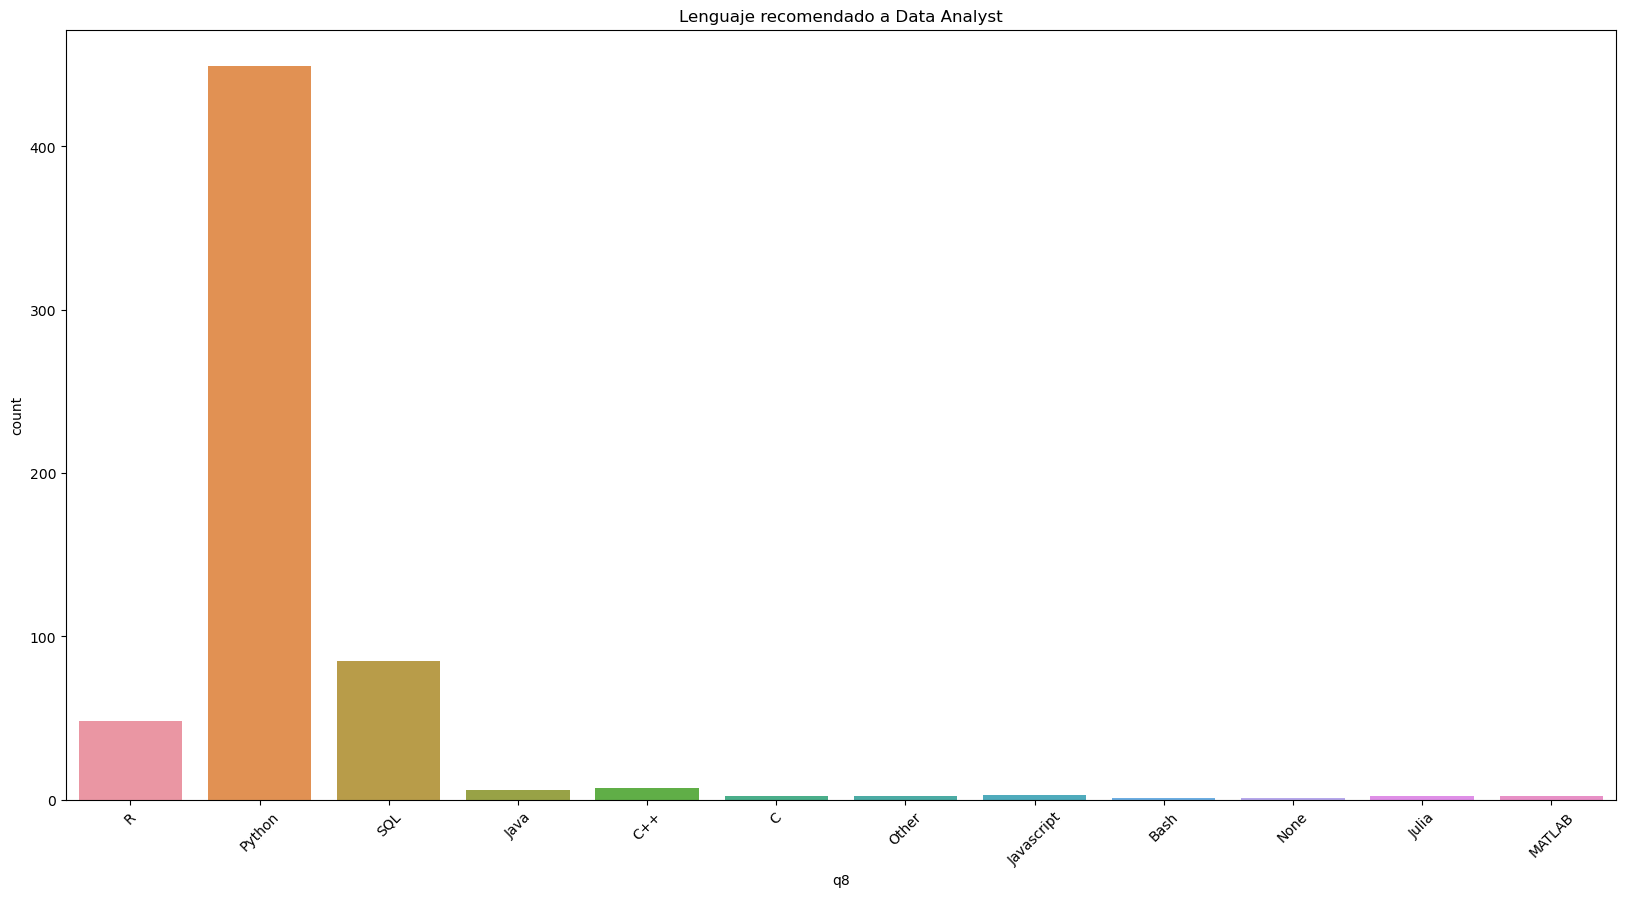

In [712]:
plt.figure(figsize=(20,10))
sns.countplot(x ='q8', data=df)
plt.title('Lenguaje recomendado a Data Analyst')
plt.xticks(rotation = 45);

[Text(0, 0.5, 'Entornos'), Text(0.5, 0, 'Conteo')]

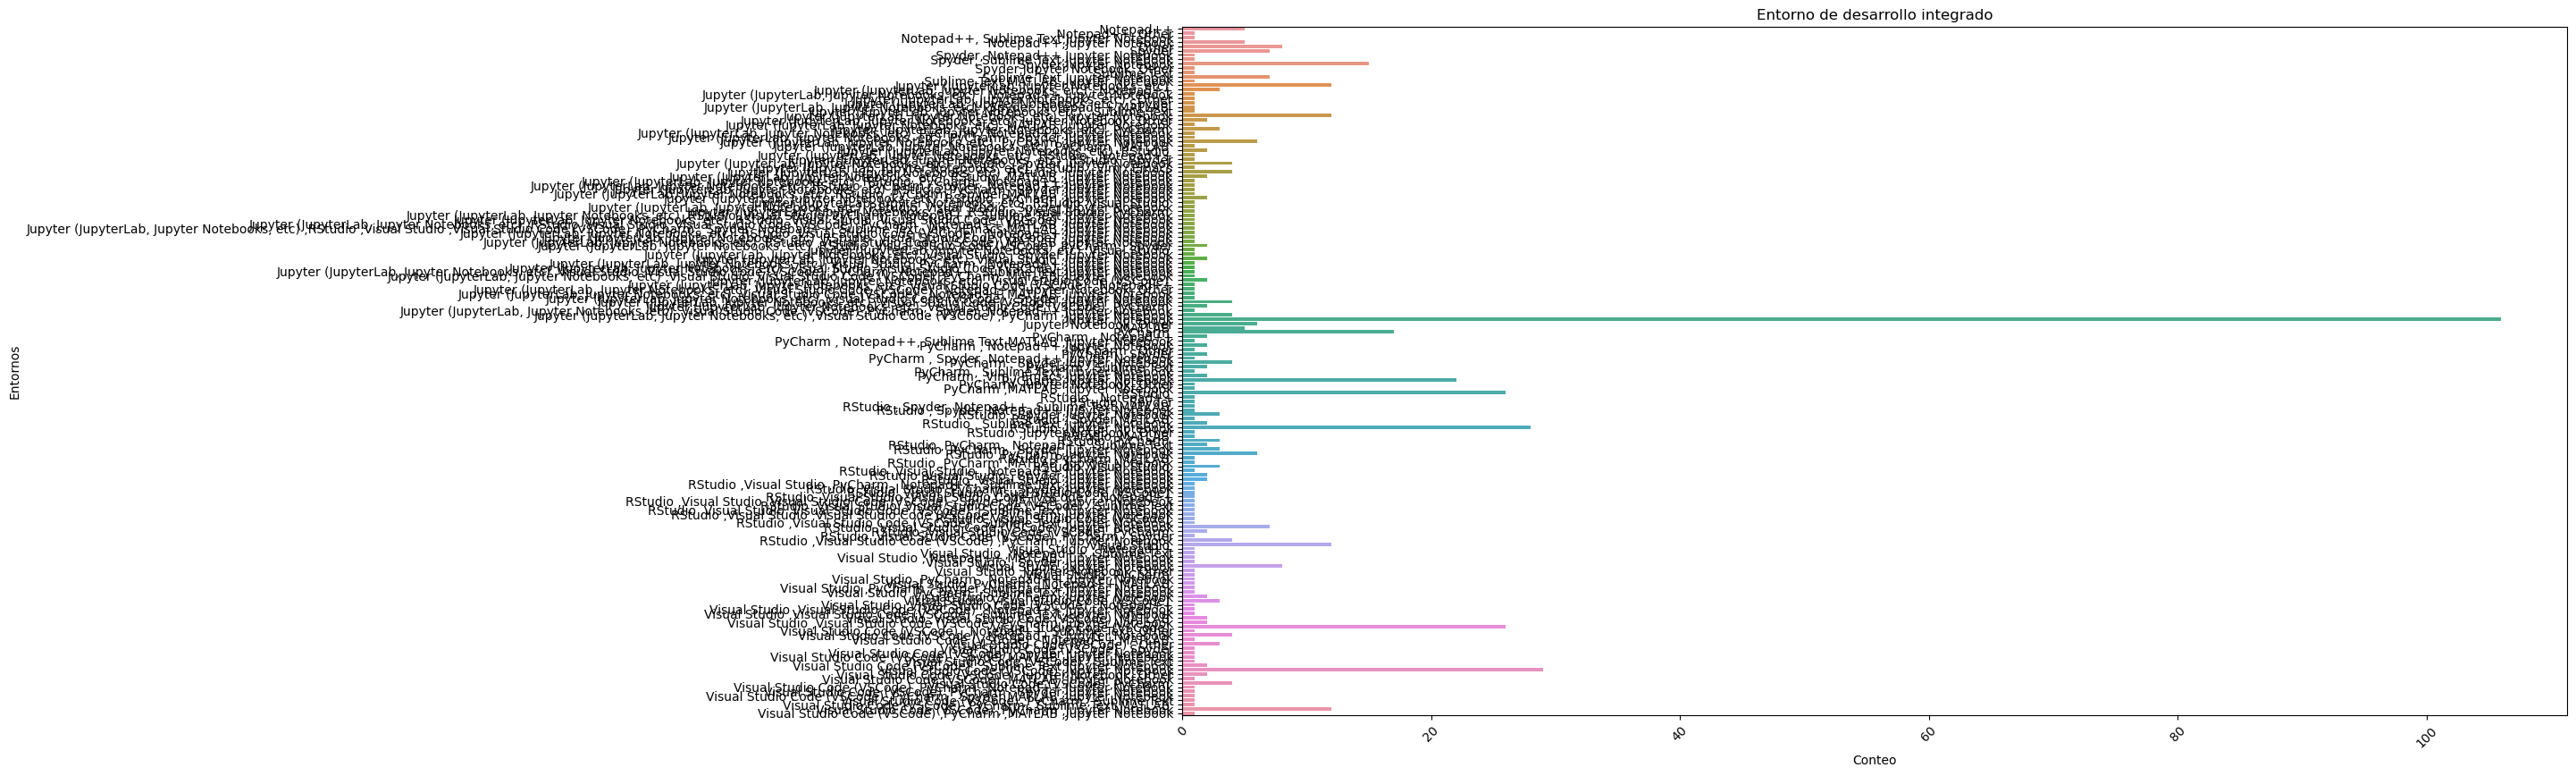

In [713]:
plt.figure(figsize=(20,10))
fig= sns.barplot(x ='count', y='q9', data=df_q9)
plt.title('Entorno de desarrollo integrado')
plt.xticks(rotation = 45)
fig.set(ylabel='Entornos', xlabel= 'Conteo')

[Text(0, 0.5, 'Herramienta'), Text(0.5, 0, 'Conteo')]

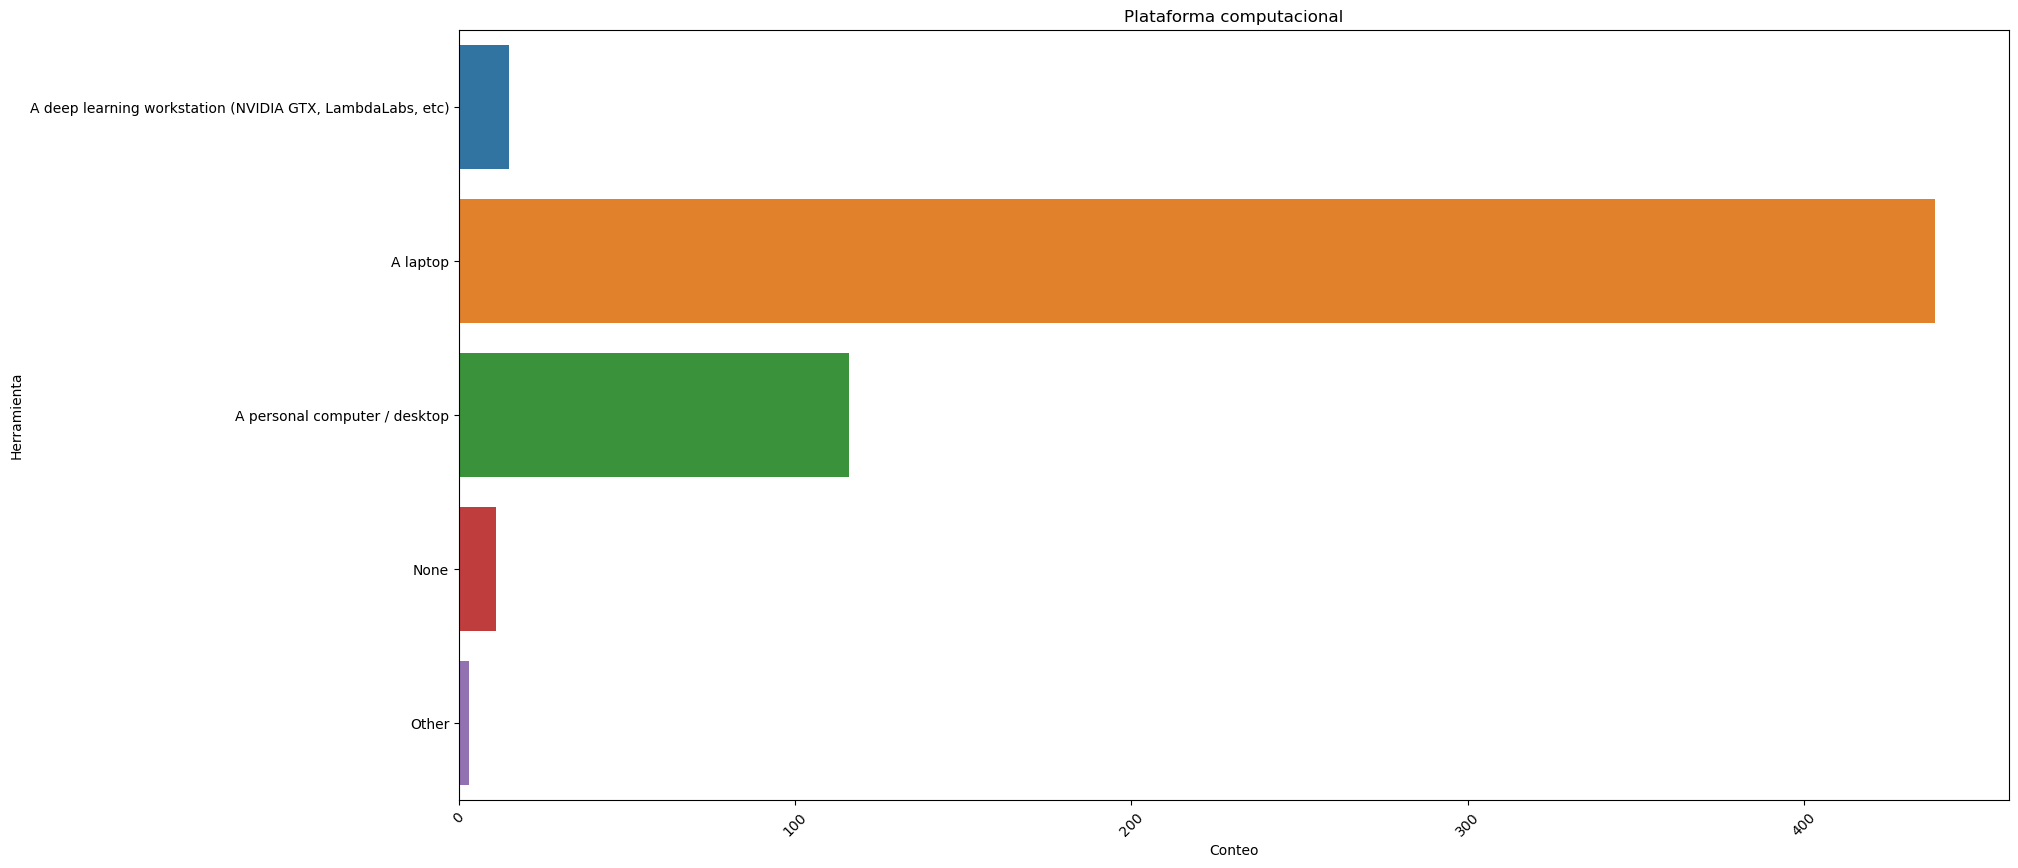

In [714]:
plt.figure(figsize=(20,10))
fig= sns.barplot(x ='count', y='q11', data=df_q11)
plt.title('Plataforma computacional')
plt.xticks(rotation = 45)
fig.set(ylabel='Herramienta', xlabel= 'Conteo')